# <center>EDA on Movies Data released between 2006 and 2016</center>

<img src = 'https://storage.googleapis.com/kaggle-datasets-images/1474/2639/cb50fd3b236d01184fd23ad59af50b4f/dataset-original.jpg' width="700" height="500">


## Table of Contents

1. [**Problem Statement**](#section1)<br><br>
2. [**Importing Packages**](#section2)<br><br>
3. [**Loading Data**](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br><br>
4. [**Data Preprocessing**](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br><br>
5. [**Analysis based on 1000 movie dataset**](#section5)<br>
  - 5.1 [Highest earning movies](#section501)<br>
  - 5.2 [Lowest earning movies](#section502)<br>
  - 5.3 [Highest earning movies year-wise](#section503)<br>
  - 5.4 [Total revenue over the years](#section504)<br>
  - 5.5 [Revenue distribution for the movies](#section505)<br>
  - 5.6 [Number of movies released over the years](#section506)<br>
  - 5.7 [Average revenue over the years](#section507)<br>
  - 5.8 [Relationship study between different fields in dataset](#section508)<br>
  - 5.9 [Distribution of votes for movies for different years and its relationship](#section509)<br>
  - 5.10 [Distribution of ratings for movies for different years and its relationship](#section510)<br>
  - 5.11 [Distribution of metascores for movies for different years and its relationship](#section511)<br>
  - 5.12 [Movies with highest rating over the year](#section512)<br>
  - 5.13 [Movies with highest metacore over the year](#section513)<br>
  - 5.14 [How Revenue and Votes are related](#section514)<br>
  - 5.15 [How Revenue and Ratings are related](#section515)<br>
  - 5.16 [How Revenue and Metascores are related](#section516)<br>
  - 5.17 [How Duration of Movie affects Revenue](#section517)<br>
  - 5.18 [Relationship between Ratings and Votes](#section518)<br>
  - 5.19 [Relationship between Metascores and Votes](#section519)<br>
  - 5.20 [Relationship between Ratings and Metascores](#section520)<br>
  - 5.21 [Relationship between Revenue and Genre](#section521)<br>
  - 5.22 [Revenue distribution for each genre over the year](#section522)<br>
  - 5.23 [Director-wise revenue](#section523)<br>
  - 5.24 [Directors with higest votes](#section524)<br>
  - 5.25 [Directors with higest ratings](#section525)<br>
  - 5.26 [Directors with higest metascores](#section526)<br><br>
6. [**Conclusion**](#section6)<br>
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

The movies data set consists of the movies information released in United States from the year 2006 to 2016.
The data set mainly consists the below information about the movies as below-

1. Movie Title
2. Genre the movie belongs to
3. Director and actors name
4. Year of release
5. Running time and revenue collected(in millions)
6. Ratings, Metascores and Votes the movie received over the duration from critics/viewers

Where,Votes are provided by viewers or users of the movie web site for particular movie.

Ratings of a particular movie is calcualted on the average weight of the votes movie has recived. 

Metascores are calculated based on the critics feedback for the movie(reference - Metacritic)


We can use the above dataset to gather the below insight
1. Highest and lowest earning movie from the given dataset
2. highest earning movies year-wise
3. Revenue generated year-wise
4. How revenue generated for a movie depends on its duration.
5. How revenue generated for a movie depends on the votes it received from viewers.
6. How revenue generated for a movie depends on its ratings.
7. How revenue generated for a movie depends on its metascore.
8. Relationship between revnue and genre of movie
9. Directors with highest revenue
10. Directors with highest ratings,votes and metscores


All the revenue analyzed below would be without adjusting to inflation and while observing the impact of genre in the revenue generated by different movies, the genre elements would be observed from each movie as movie may belong to multiple genres , like movie may belong to Action,Thriller , so there are 2 genre elements to which movie belongs

<a id=section2></a>
## 2. Importing Packages

In [1]:
!pip install --upgrade pip
!pip install --upgrade pandas
!pip install --upgrade numpy

Requirement already up-to-date: pip in c:\anaconda3\lib\site-packages (19.3.1)
Requirement already up-to-date: pandas in c:\anaconda3\lib\site-packages (0.25.3)
Requirement already up-to-date: numpy in c:\anaconda3\lib\site-packages (1.17.3)


In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\anaconda3\lib\site-packages (4.2.1)


In [5]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [6]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

We are using the data set for analyzing the information about movies released in span of 11 years, 2006-2016


- **1000 movies data** dataset: This dataset contains information about the movies released in United states in 2006-2016 along with the information about its ratings,revnues,directors and lead actors.


### Importing the Dataset

In [7]:
# Importing the 1st dataset (Nutrition Facts for McDonald's Menu dataset).

moviesdf=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv',error_bad_lines=False,encoding='utf-8')
moviesdf.head()

Rank                    Title                     Genre  \
0  1     Guardians of the Galaxy  Action,Adventure,Sci-Fi    
1  2     Prometheus               Adventure,Mystery,Sci-Fi   
2  3     Split                    Horror,Thriller            
3  4     Sing                     Animation,Comedy,Family    
4  5     Suicide Squad            Action,Adventure,Fantasy   

                                                                                                                                                                                                                      Description  \
0  A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.                                                                                                  
1  Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.                                                                                                  
2  Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.                                                                    
3  In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.   
4  A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.                                              

               Director  \
0  James Gunn             
1  Ridley Scott           
2  M. Night Shyamalan     
3  Christophe Lourdelet   
4  David Ayer             

                                                                       Actors  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                         
1  Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron      
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula             
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4  Will Smith, Jared Leto, Margot Robbie, Viola Davis                           

   Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0  2014  121                8.1     757074  333.13              76.0       
1  2012  124                7.0     485820  126.46              65.0       
2  2016  117                7.3     157606  138.12              62.0       
3  2016  108                7.2     60545   270.32              59.0       
4  2016  123                6.2     393727  325.02              40.0

<a id=section301></a>
### Description of the Dataset

- This dataset provides the information about the movies released in United States during the years, 2006-2016.


- Detailed information about each column


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Rank                       | Rank of the movie.                                                   | 
| Title                           | Title of the movie.                                                                          | 
| Genre                     | Genre movie belongs to.                                                        | 
| Description                         | Describing the synopsis about the movie                                                     |
| Director                        | Director of the movie.                                                                   |
| Actors                      | Actors of the movie.                                                                 |
| Year                  | Year of movie release.                                                             |
| Runtime(Minutes)                      | Duration of the movie in minutes.                                                                 |
| Rating                     | Rating of the movie.                                                               |
| Votes                  | Number of votes received for the movie.                                                             |
| Revenue(Millions)                         | Revenue collected by movie in millions(USD).                                                                    |
| Metascore                  | Metascore of the movie.                                                            |


In [8]:
moviesdf.shape

(1000, 12)

Here we know that there are 1000 rows and 12 columns

In [9]:
moviesdf.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Above is the list of columns as mentioned in Description section

In [10]:
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


- ```info``` function gives us the following insights into the moviesdf dataframe:

  - There are a total of **1000 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **4 columns** with a **numeric** datatype 
  - There are **5 columns** with an **object** datatype.
  - There are **3 columns** with a **float** datatype.
  
  - There are **228 missing** values in the Revenue(Millions) column.
  - There are **64 missing** values in the Metascore column.

In [11]:
moviesdf.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000  1000.000000        1000.000000  1.000000e+03   
mean   500.500000   2012.783000  113.172000         6.723200     1.698083e+05   
std    288.819436   3.205962     18.810908          0.945429     1.887626e+05   
min    1.000000     2006.000000  66.000000          1.900000     6.100000e+01   
25%    250.750000   2010.000000  100.000000         6.200000     3.630900e+04   
50%    500.500000   2014.000000  111.000000         6.800000     1.107990e+05   
75%    750.250000   2016.000000  123.000000         7.400000     2.399098e+05   
max    1000.000000  2016.000000  191.000000         9.000000     1.791916e+06   

       Revenue (Millions)   Metascore  
count  872.000000          936.000000  
mean   82.956376           58.985043   
std    103.253540          17.194757   
min    0.000000            11.000000   
25%    13.270000           47.000000   
50%    47.985000           59.500000   
75%    113.715000          72.000000   
max    936.630000          100.000000

- ```describe``` function gives us the following insights into the moviesdf dataframe:

  - The data is for **1000 movie titles for 2006-2016**.
  - **The minimum revuenue is 0 million which is highly unlikely but possible if movie not released in theatres or suffered huge losses**.
  - As observed before, as per the data from count function, **missing values in Revenue and Metascore fields**.
  - For Revenue column, **the third quartile(75 %) has value of approx 113 million USD, but the max value is approx 936 million USD, so it seems few movies have earned much higher than remaining movies**. 
  - For Revenue, **the mean is greater than median, so data seems to be right skewed**.


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [12]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\anaconda3\lib\site-packages (2.3.0)


In [13]:
import pandas_profiling 

In [14]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = moviesdf.profile_report(title='Pandas Profiling for Movies data before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.

moviesdf.profile_report(title='Pandas Profiling for Movies data before Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 1000
- Missing cells: 192 (1.6%)


__Variables types__: 
- Numeric = 7
- Categorical = 4
- Text (Unique) = 1
- Rejected = 0

<br>

- **Actors field has a high cardinality: 996 distinct values**, it is fine as we have different actors for the films in the list.

- **Director field has a high cardinality: 644 distinct values**, it is fine as we have different directors for the films in the list.

- **Genre field has a high cardinality: 207 distinct values**, which is fine as movies in the list belongs to different genre.

- **Title field has a high cardinality: 999 distinct values**, which is fine as movies in the list have different titles.


- **Metascore** has **64 (6.4%) missing values**.

- **Revenue(Millions)** has **128 (12.8%) missing values**

 - We can't drop the missing values rows as the missing values row count is significant and dropping those would result into loss of other data as well which is needed for analysis.
However, we can analyze the records which have missing value for both - Metascore and Revenue fields and if we can drop those.

- **The movie title - "The Host" occurred 2 times in the list**, that needs to be verified if same movie or different, that can be checked using director and year of both the entries, if same, duplicate can be removed from analysis

- The genre - "Drama"(48) and "Action,adventure and Sci-fi"(50) has maximum entries in the list

- "Ridley Scott" has 8 entries, followed by Paul W.S. Anderson,Michael Bay,M. Night Shyamalan,David Yates - 6 each

- The list has maximum entries belonged to 2016(297) followed by 2015(127) and minimum for 2006(44) and 2007(53), means latest movie has high chance of popularity as compared to older ones.

- Most of the **movies have runtime 90-120**, that means too short or too long movies may not be popular much with few exceptions.

- **Metascore mostly between 64-72 for the movies**, metscore above 75 generally considered very good for any movie

- **Metascore and Rating are correlated, approx p-value of 0.65**.

- **Votes and Revene(Millions) are correlated, approx p-value of 0.50**.

- **Revenue(Millions) has an outlier of 936.63 which is too high when compared to Q3 (75%) value of 113.715**
  - This means few number movies have earned too much when compared to other movies in the list


<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [15]:
moviesdf.head()

Rank                    Title                     Genre  \
0  1     Guardians of the Galaxy  Action,Adventure,Sci-Fi    
1  2     Prometheus               Adventure,Mystery,Sci-Fi   
2  3     Split                    Horror,Thriller            
3  4     Sing                     Animation,Comedy,Family    
4  5     Suicide Squad            Action,Adventure,Fantasy   

                                                                                                                                                                                                                      Description  \
0  A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.                                                                                                  
1  Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.                                                                                                  
2  Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.                                                                    
3  In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.   
4  A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.                                              

               Director  \
0  James Gunn             
1  Ridley Scott           
2  M. Night Shyamalan     
3  Christophe Lourdelet   
4  David Ayer             

                                                                       Actors  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                         
1  Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron      
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula             
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4  Will Smith, Jared Leto, Margot Robbie, Viola Davis                           

   Year  Runtime_(Minutes)  Rating   Votes  Revenue_(Millions)  Metascore  
0  2014  121                8.1     757074  333.13              76.0       
1  2012  124                7.0     485820  126.46              65.0       
2  2016  117                7.3     157606  138.12              62.0       
3  2016  108                7.2     60545   270.32              59.0       
4  2016  123                6.2     393727  325.02              40.0

- The column **Description** has no impact on analysis, so can be removed from the dataframe.

- Also the columns **Revenue(Millions) and Runtime(minutes)** can be renamed to **Revenue and Runtime** respectively for further use during analysis.

In [16]:
#Dropping the column - Description
moviesdf.drop(['Description'], 1, inplace=True)

In [17]:
#Changing columns names for Revenue(Millions) to Revenue and Runtime(minutes) to Runtime
moviesdf.rename(columns={'Revenue_(Millions)':'Revenue','Runtime_(Minutes)':'Runtime'}, inplace=True)

In [18]:
moviesdf.head()

Rank                    Title                     Genre  \
0  1     Guardians of the Galaxy  Action,Adventure,Sci-Fi    
1  2     Prometheus               Adventure,Mystery,Sci-Fi   
2  3     Split                    Horror,Thriller            
3  4     Sing                     Animation,Comedy,Family    
4  5     Suicide Squad            Action,Adventure,Fantasy   

               Director  \
0  James Gunn             
1  Ridley Scott           
2  M. Night Shyamalan     
3  Christophe Lourdelet   
4  David Ayer             

                                                                       Actors  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                         
1  Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron      
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula             
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4  Will Smith, Jared Leto, Margot Robbie, Viola Davis                           

   Year  Runtime  Rating   Votes  Revenue  Metascore  
0  2014  121      8.1     757074  333.13   76.0       
1  2012  124      7.0     485820  126.46   65.0       
2  2016  117      7.3     157606  138.12   62.0       
3  2016  108      7.2     60545   270.32   59.0       
4  2016  123      6.2     393727  325.02   40.0

- Analyze the missing values in the columns - **Revenue** and **Metascore**

In [19]:
#Count of missing values in each column
moviesdf.isna().sum()

Rank         0  
Title        0  
Genre        0  
Director     0  
Actors       0  
Year         0  
Runtime      0  
Rating       0  
Votes        0  
Revenue      128
Metascore    64 
dtype: int64

In [20]:
#Checking the count where Revenue has missing value
moviesdf[moviesdf['Revenue'].isnull()].isnull().sum()

Rank         0  
Title        0  
Genre        0  
Director     0  
Actors       0  
Year         0  
Runtime      0  
Rating       0  
Votes        0  
Revenue      128
Metascore    30 
dtype: int64

In [21]:
#Checking the count where Revenue has missing value
moviesdf[moviesdf['Metascore'].isnull()].isnull().sum()

Rank         0 
Title        0 
Genre        0 
Director     0 
Actors       0 
Year         0 
Runtime      0 
Rating       0 
Votes        0 
Revenue      30
Metascore    64
dtype: int64

In [22]:
moviesdf[moviesdf['Revenue'].isnull() & moviesdf['Metascore'].isnull()].isnull().sum()

Rank         0 
Title        0 
Genre        0 
Director     0 
Actors       0 
Year         0 
Runtime      0 
Rating       0 
Votes        0 
Revenue      30
Metascore    30
dtype: int64

In [23]:
moviesdf[moviesdf['Title']=='The Host']

Rank     Title                     Genre       Director  \
239  240   The Host  Action,Adventure,Romance  Andrew Niccol   
632  633   The Host  Comedy,Drama,Horror       Bong Joon Ho    

                                                  Actors  Year  Runtime  \
239  Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger    2013  125       
632  Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doona Bae  2006  120       

     Rating  Votes  Revenue  Metascore  
239  5.9     96852  26.62    35.0       
632  7.0     73491  2.20     85.0

 - As per above, only the columns - **Revenue** and **Metascore** have missing values as suggested by pre-profiling report.

 - Since count of rows having missing value in either **Revenue(128) or Metascore(64)** is not too low, so dropping them can impact the analysis of other fields.

 - Since **NaN values have no impact in the statistical study**, so it would be safe to retain those records

  - We can ignore the missing values in **Revenue and Metascore** while analyzing their relationship with other fields, instead of droping those values permamnently from the dataframe.

 - Since the missing value could mean, either no revenue or metascore information so while studying the relationship between Revenue and metascore, can remove the missing values from the data, so that the trend can be analyzed on the proper values.
 
 - "The Host" multiple entries are of 2 different movies released in different year, so no redundant entry found for it.

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [24]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html
'''
profile = df_merge.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.

moviesdf.profile_report(title='Pandas Profiling for movies data after Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
 - Not much change as compared to pre-processing profiling result as we have not dropped any missing values and also not modified any value.

 - Though, Description field is not present in the dataset.

<a id=section5></a>
## 5. Exploratory Data Analysis on provided movie dataset

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>
### **5.1 Highest earning movies**

For analyzing the revenue, though no impact, but first delete all records with missing values in revenue column and analyze the resultant subset

In [25]:
revmoviesdf=moviesdf.dropna(subset=['Revenue'])
revmoviesdf.isna().sum()

Rank         0 
Title        0 
Genre        0 
Director     0 
Actors       0 
Year         0 
Runtime      0 
Rating       0 
Votes        0 
Revenue      0 
Metascore    34
dtype: int64

In [26]:
#Top 10 earning movies
revmoviesdf.sort_values(by=['Revenue'], ascending=False)[:10]

Rank                                       Title  \
50   51    Star Wars: Episode VII - The Force Awakens   
87   88    Avatar                                       
85   86    Jurassic World                               
76   77    The Avengers                                 
54   55    The Dark Knight                              
12   13    Rogue One                                    
119  120   Finding Dory                                 
94   95    Avengers: Age of Ultron                      
124  125   The Dark Knight Rises                        
578  579   The Hunger Games: Catching Fire              

                          Genre           Director  \
50   Action,Adventure,Fantasy    J.J. Abrams         
87   Action,Adventure,Fantasy    James Cameron       
85   Action,Adventure,Sci-Fi     Colin Trevorrow     
76   Action,Sci-Fi               Joss Whedon         
54   Action,Crime,Drama          Christopher Nolan   
12   Action,Adventure,Sci-Fi     Gareth Edwards      
119  Animation,Adventure,Comedy  Andrew Stanton      
94   Action,Adventure,Sci-Fi     Joss Whedon         
124  Action,Thriller             Christopher Nolan   
578  Action,Adventure,Mystery    Francis Lawrence    

                                                                         Actors  \
50   Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson                     
87   Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez           
85   Chris Pratt, Bryce Dallas Howard, Ty Simpkins,Judy Greer                     
76   Robert Downey Jr., Chris Evans, Scarlett Johansson,Jeremy Renner             
54   Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine                    
12   Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen                           
119  Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kaitlin Olson                     
94   Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth                
124  Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman                         
578  Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Philip Seymour Hoffman   

     Year  Runtime  Rating    Votes  Revenue  Metascore  
50   2015  136      8.1     661608   936.63   81.0       
87   2009  162      7.8     935408   760.51   83.0       
85   2015  124      7.0     455169   652.18   59.0       
76   2012  143      8.1     1045588  623.28   69.0       
54   2008  152      9.0     1791916  533.32   82.0       
12   2016  133      7.9     323118   532.17   65.0       
119  2016  97       7.4     157026   486.29   77.0       
94   2015  141      7.4     516895   458.99   66.0       
124  2012  164      8.5     1222645  448.13   78.0       
578  2013  146      7.6     525646   424.65   76.0

Text(0.5, 1.0, 'Highest earning movies')

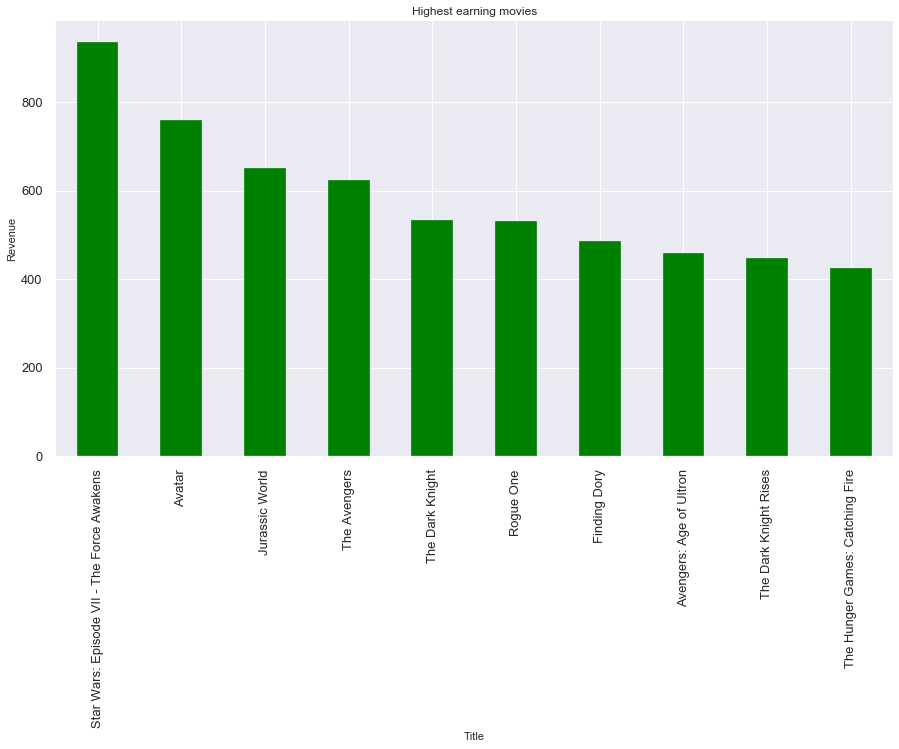

In [27]:
revmoviesdf.groupby(['Title'])['Revenue'].mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(15,8), fontsize=13, color='green')
plt.ylabel('Revenue')
plt.title("Highest earning movies")

- As per the above graph, highest earning movies
    - Star Wars Episode VII - The Force awakens
    - Avatar
    - Jurrasic World
    - The Avengers
    - The Dark Knight

<a id=section502></a>
### **5.2 Lowest earning movies**

In [28]:
#10 lowest earning movies
revmoviesdf.sort_values(by=['Revenue'])[:10]

Rank                     Title                  Genre          Director  \
231  232   A Kind of Murder          Crime,Drama,Thriller   Andy Goddard       
961  962   Into the Forest           Drama,Sci-Fi,Thriller  Patricia Rozema    
677  678   Love, Rosie               Comedy,Romance         Christian Ditter   
321  322   Lovesong                  Drama                  So Yong Kim        
68   69    Wakefield                 Drama                  Robin Swicord      
27   28    Dead Awake                Horror,Thriller        Phillip Guzman     
661  662   The First Time            Comedy,Drama,Romance   Jon Kasdan         
736  737   The Blackcoat's Daughter  Horror,Thriller        Oz Perkins         
927  928   The Sea of Trees          Drama                  Gus Van Sant       
490  491   Stake Land                Drama,Horror,Sci-Fi    Jim Mickle         

                                                                  Actors  \
231  Patrick Wilson, Jessica Biel, Haley Bennett, Vincent Kartheiser       
961  Ellen Page, Evan Rachel Wood, Max Minghella,Callum Keith Rennie       
677  Lily Collins, Sam Claflin, Christian Cooke, Jaime Winstone            
321  Riley Keough, Jena Malone, Jessie Ok Gray, Cary Joji Fukunaga         
68   Bryan Cranston, Jennifer Garner, Beverly D'Angelo,Jason O'Mara        
27   Jocelin Donahue, Jesse Bradford, Jesse Borrego,Lori Petty             
661  Dylan O'Brien, Britt Robertson, Victoria Justice, James Frecheville   
736  Emma Roberts, Kiernan Shipka, Lauren Holly, Lucy Boynton              
927  Matthew McConaughey, Naomi Watts, Ken Watanabe,Ryoko Seta             
490  Connor Paolo, Nick Damici, Kelly McGillis, Gregory Jones              

     Year  Runtime  Rating  Votes  Revenue  Metascore  
231  2016  95       5.2     3305   0.00     50.0       
961  2015  101      5.9     10220  0.01     59.0       
677  2014  102      7.2     80415  0.01     44.0       
321  2016  84       6.4     616    0.01     74.0       
68   2016  106      7.5     291    0.01     61.0       
27   2016  99       4.7     523    0.01    NaN         
661  2012  95       6.9     54027  0.02     55.0       
736  2015  93       5.6     4155   0.02     68.0       
927  2015  110      5.9     7475   0.02     23.0       
490  2010  98       6.5     36091  0.02     66.0

Text(0.5, 1.0, 'Lowest earning movies')

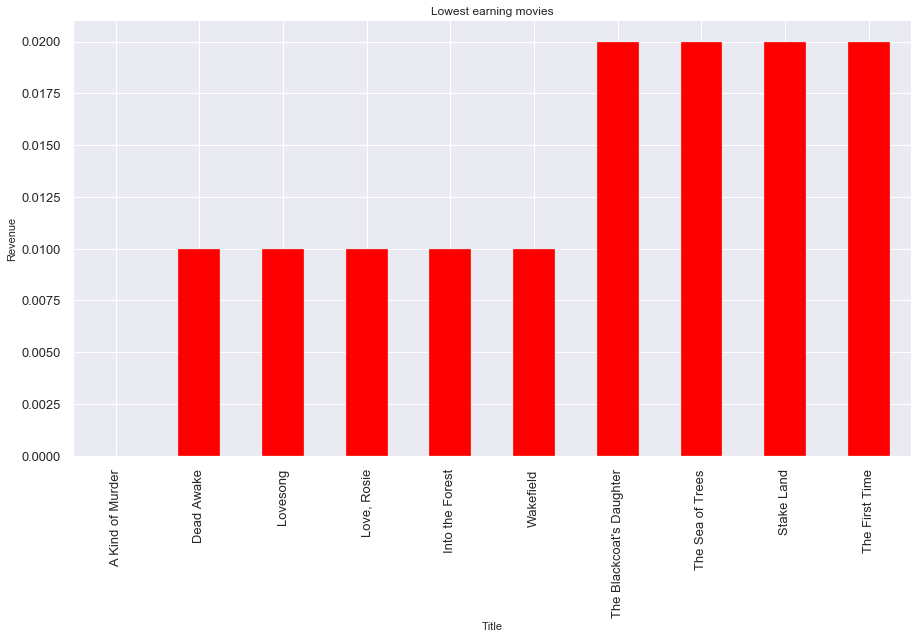

In [29]:
revmoviesdf.groupby(['Title'])['Revenue'].mean().sort_values(ascending=True)[:10].plot(kind='bar', figsize=(15,8), fontsize=13, color='red')
plt.ylabel('Revenue')
plt.title("Lowest earning movies")

- Lowest earning movie list
    - A kind of Murder
    - Dead Awake
    - LoveSong
    - Love,Rosie
    
- The lowest earning movie - "A kind of Murder" has revenue of 0 million, while other movies too have very low revenue.

- The reason could be that some of the movies may not be released to the theatres and available in the form of D2H or DVD format, which is very common in US.

- A movie with revenue of 0, unlikely but possible and hence not considering it an outlier

<a id=section503></a>
### **5.3 Highest earning movies year-wise**

In [30]:
#Highest earning movies year-wise
revmoviesdf.sort_values(by=['Revenue'], ascending=False).groupby('Year').first()

Rank                                         Title  \
Year                                                       
2006  79    Pirates of the Caribbean: Dead Man's Chest     
2007  345   Spider-Man 3                                   
2008  55    The Dark Knight                                
2009  88    Avatar                                         
2010  689   Toy Story 3                                    
2011  115   Harry Potter and the Deathly Hallows: Part 2   
2012  77    The Avengers                                   
2013  579   The Hunger Games: Catching Fire                
2014  332   American Sniper                                
2015  51    Star Wars: Episode VII - The Force Awakens     
2016  13    Rogue One                                      

                           Genre           Director  \
Year                                                  
2006  Action,Adventure,Fantasy    Gore Verbinski      
2007  Action,Adventure            Sam Raimi           
2008  Action,Crime,Drama          Christopher Nolan   
2009  Action,Adventure,Fantasy    James Cameron       
2010  Animation,Adventure,Comedy  Lee Unkrich         
2011  Adventure,Drama,Fantasy     David Yates         
2012  Action,Sci-Fi               Joss Whedon         
2013  Action,Adventure,Mystery    Francis Lawrence    
2014  Action,Biography,Drama      Clint Eastwood      
2015  Action,Adventure,Fantasy    J.J. Abrams         
2016  Action,Adventure,Sci-Fi     Gareth Edwards      

                                                                          Actors  \
Year                                                                               
2006  Johnny Depp, Orlando Bloom, Keira Knightley, Jack Davenport                  
2007  Tobey Maguire, Kirsten Dunst, Topher Grace, Thomas Haden Church              
2008  Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine                    
2009  Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez           
2010  Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty                                
2011  Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon                  
2012  Robert Downey Jr., Chris Evans, Scarlett Johansson,Jeremy Renner             
2013  Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Philip Seymour Hoffman   
2014  Bradley Cooper, Sienna Miller, Kyle Gallner, Cole Konis                      
2015  Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson                     
2016  Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen                           

      Runtime  Rating    Votes  Revenue  Metascore  
Year                                                
2006  151      7.3     552027   423.03   53.0       
2007  139      6.2     406219   336.53   59.0       
2008  152      9.0     1791916  533.32   82.0       
2009  162      7.8     935408   760.51   83.0       
2010  103      8.3     586669   414.98   92.0       
2011  130      8.1     590595   380.96   87.0       
2012  143      8.1     1045588  623.28   69.0       
2013  146      7.6     525646   424.65   76.0       
2014  133      7.3     353305   350.12   72.0       
2015  136      8.1     661608   936.63   81.0       
2016  133      7.9     323118   532.17   65.0

Text(0.5, 1.0, 'Highest earning movies by years')

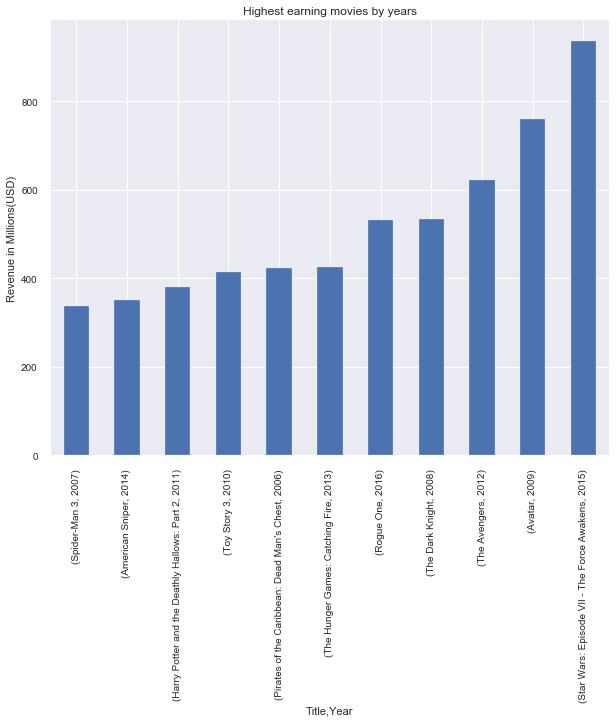

In [31]:
tmp=revmoviesdf.sort_values(by=['Revenue'], ascending=False).groupby('Year').first()
tmp.groupby(['Title','Year'])['Revenue'].sum().sort_values().plot.bar(x='Title', y='Revenue', figsize=(10,8))
plt.ylabel('Revenue in Millions(USD)')
plt.title("Highest earning movies by years")

- Highest earning movie year-wise
    - Star Wars Episode VII - The Force awakens
    - Avatar
    - The Avengers
    - The Dark Knight
    
- Year 2015 has the highest earning movie - Star Wars, followed by Year 2009 with Avatar.

- There is no trend of increasing movie revenue with the year-wise increasing price of movie tickets, as the highest earning movie was released in 2015(Start Wars VII) followed by 2009(Avatar) and then 2012(The Avengers).

- The movie released in 2006(Pirates of Carribean) has earned much more than the movies released in 2010,2011 and 2014.

- Highest earning movie in 2016(Rougue One) has earned less than highest earning movies in 2012,2009.

<a id=section504></a>
### **5.4 Total revenue over the years**

Text(0.5, 1.0, 'Total Revenue By Years')

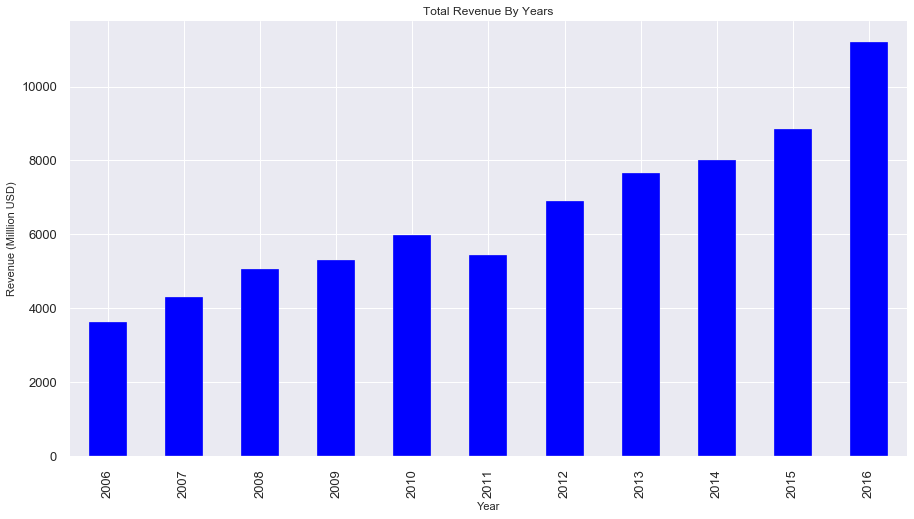

In [32]:
revmoviesdf.groupby(['Year'])['Revenue'].sum().plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Revenue (Milllion USD)')
plt.title("Total Revenue By Years")

Text(0.5, 1.0, 'Total Revenue By Years')

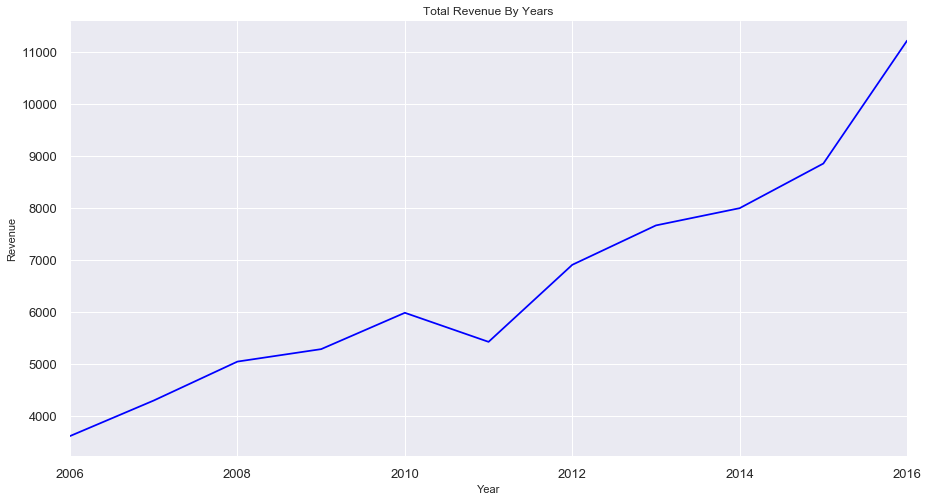

In [33]:
revmoviesdf.groupby(['Year'])['Revenue'].sum().plot(kind='line', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Revenue')
plt.title("Total Revenue By Years")

- Contrary to the previous section where we observed that the revenue of highest earning movies are not dependent on increasing ticket price over the years, here we observe that the year-wise increasing ticket price has actually increased the revenue over the years.

- The revenue trend has been generally increasing over the year and revenue generated in 2014,2015 and 2016 is much more compared to the years before than 2012.

<a id=section505></a>
### **5.5 Revenue distribution for the movies**

Text(0.5, 1.0, 'Revenue distribution for movies')

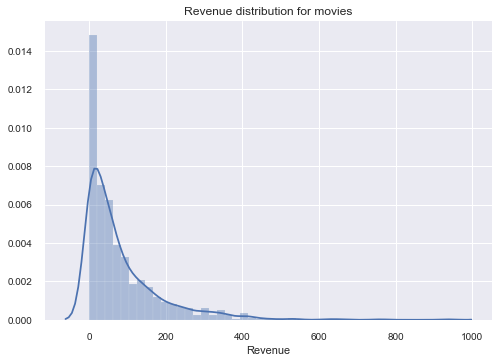

In [34]:
#Revenue distribution
sns.distplot(revmoviesdf['Revenue']).set_title("Revenue distribution for movies")


- Most of the movies have earned in the range till 150 million and some earned 200 milllion and very few earned more than 400 million with couple of movies earning more than 800 million

<a id=section506></a>
### **5.6 Number of movies released over the years**

Text(0.5, 1.0, 'Number of Movies released by Years')

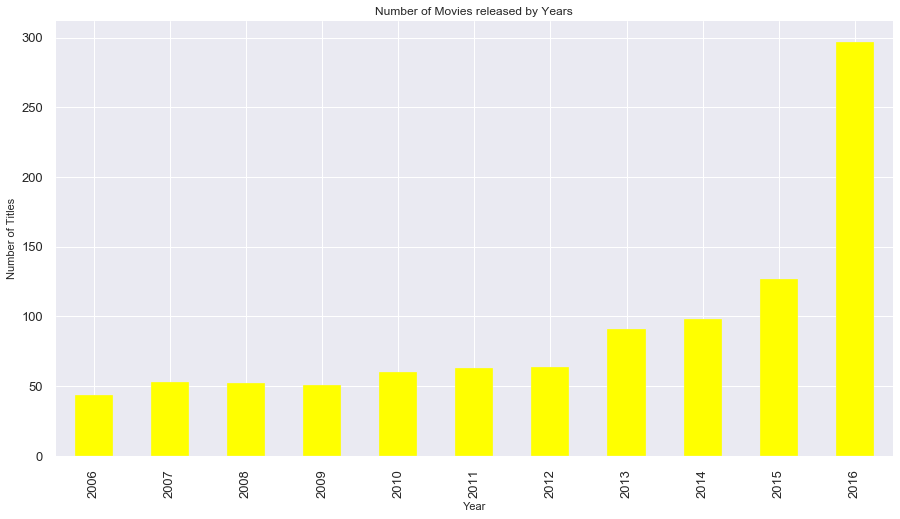

In [35]:
moviesdf.groupby(['Year'])['Title'].count().plot(kind='bar', figsize=(15,8), fontsize=13, color='yellow')
plt.ylabel('Number of Titles')
plt.title("Number of Movies released by Years")

- From the above graph we can observe the number of movies releasing per year has increased significantly.
- So, this resulted in the total revenue increased over the year as we observed in previous section
- The number of movies released in 2016 are much more when compared to other years and that could be the reason the revenue generation which was observed earlier is huge in 2016 when compared to other years

<a id=section507></a>
### **5.7 Average revenue over the years**

In [36]:
revmoviesdf.groupby(['Year'])['Revenue'].sum()

Year
2006    3624.46 
2007    4306.23 
2008    5053.22 
2009    5292.26 
2010    5989.65 
2011    5431.96 
2012    6910.29 
2013    7666.72 
2014    7997.40 
2015    8854.12 
2016    11211.65
Name: Revenue, dtype: float64

In [37]:
revmoviesdf.groupby(['Year'])['Revenue'].mean()

Year
2006    86.296667 
2007    87.882245 
2008    99.082745 
2009    112.601277
2010    105.081579
2011    87.612258 
2012    107.973281
2013    87.121818 
2014    85.078723 
2015    78.355044 
2016    54.690976 
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Average Revenue By Years')

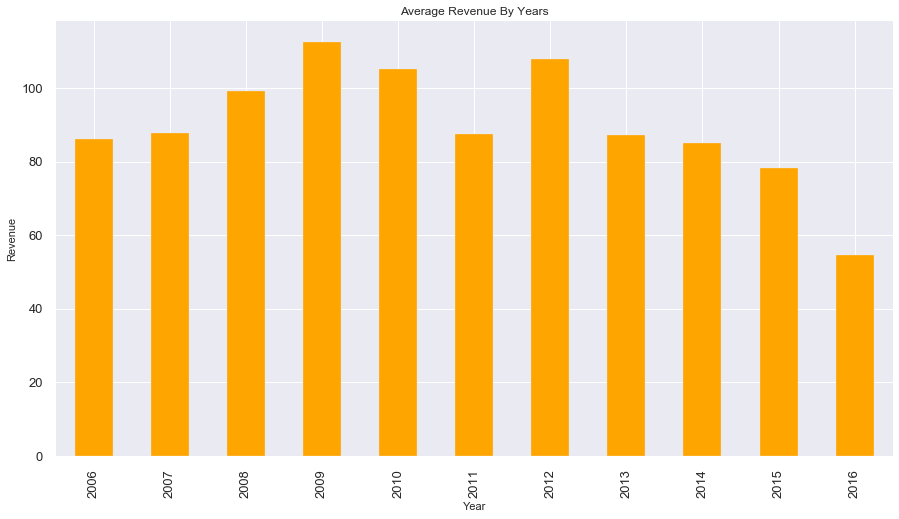

In [38]:
revmoviesdf.groupby(['Year'])['Revenue'].mean().plot(kind='bar', figsize=(15,8), fontsize=13, color='orange')
plt.ylabel('Revenue')
plt.title("Average Revenue By Years")

Text(0.5, 1.0, 'Average Revenue By Years')

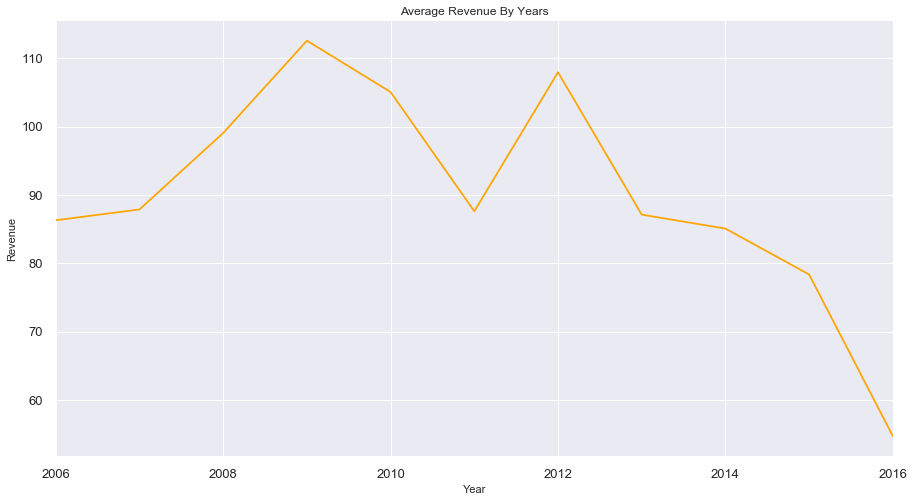

In [39]:
revmoviesdf.groupby(['Year'])['Revenue'].mean().plot(kind='line', figsize=(15,8), fontsize=13, color='orange')
plt.ylabel('Revenue')
plt.title("Average Revenue By Years")

- From the above bar and line chart, we can observe that the average revenue is least in 2016 and maximum in 2009 followed by 2012.
- So, we can observe that though the total revenue has increased over the years, but the average revenue has been decreased as the number of movies releasing has been increased over the years.
- So our assumption that the increasing ticket price has increased the revenue may not be correct as more movies releasing has increased the total revenue but decreased the average revenue.
- Since the ticket price is not mentioned in the data, so we can't predict its impact on movie revenue

<a id=section508></a>
### **5.8 Relationship study between different fields in dataset**

Text(0.5, 1, 'Relation betweem Movie dataset fields')

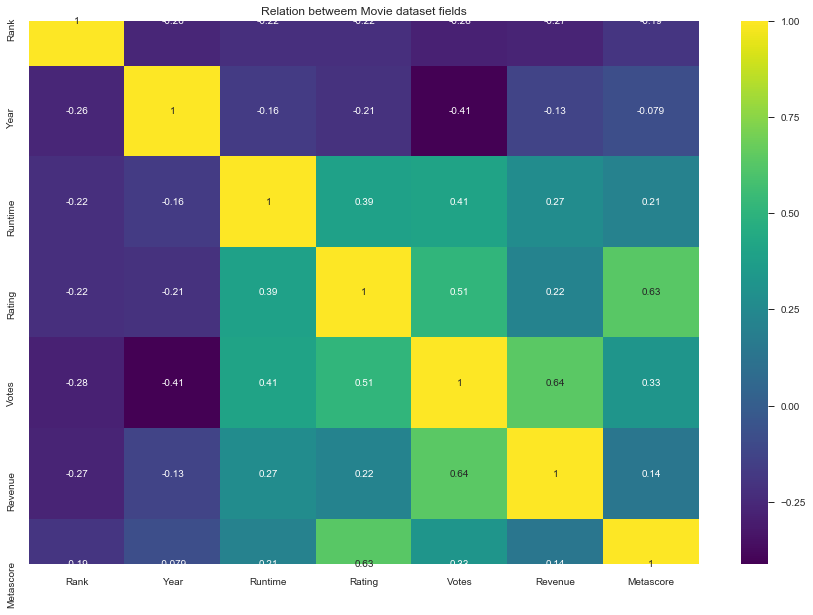

In [40]:
corr = moviesdf.corr()

figure = plt.figure(figsize=(15,10))

sns.heatmap(data=corr, annot=True,cmap='viridis',xticklabels=True, yticklabels=True).set_title("Relation betweem Movie dataset fields")

- From the above graph, we can observe that below fields have mild high correlation

 -  Rating and Metascore
 - Revenue and Votes
 - Votes and rating

- While below fields have very low correlation
 - Rating and Revenue
 - Runtime and revenue

- And Rank and year are negatively correlated with other fields.


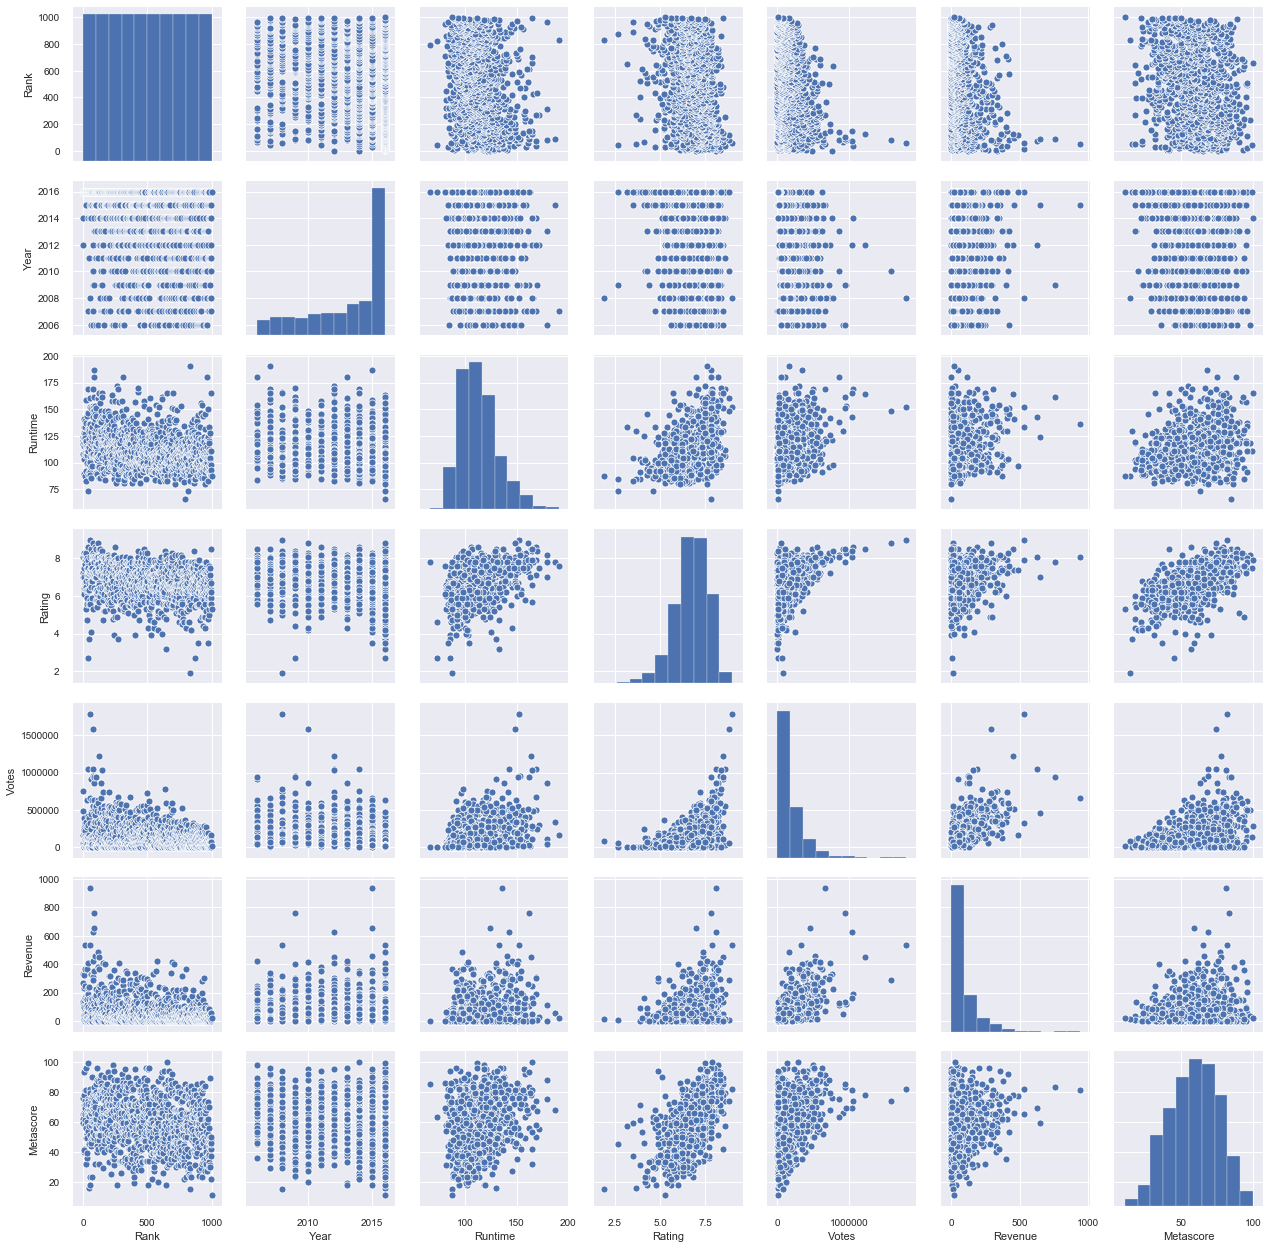

In [41]:
sns.pairplot(moviesdf)

 - The year plot is right-skewed denoting the number of movies increased over the year and maximum in 2016.
 - Revenue and run-time plot, we can observe that the movies for rumtime 100-120 have earned maximum revenue.
 - We can pbserve the mild-linear dependency on ratings and revenue, most of the high-earning movies have rating more than 7.
 - Rating and metascore have linear relationship.
 - Votes plots are left-skewed as average number of votes have decreased over the years
 - mild linear trend between votes and revenue generation, as most of the movies earned more than 500 have more than 500000 votes.
 - Revenue is left-skewed as average revenue decreased over the year.
 - Metascore is constant over the year and also no imapct on revenue of any movie

<a id=section509></a>
### **5.9 Distribution of votes for movies for different years and its relationship**

Study how the number of votes have distributed for the movie belong to different years and if any relationship between votes and years as observed in above heatmap

In [42]:
moviesdf.groupby(['Year'])['Votes'].sum()

Year
2006    11848758
2007    12949545
2008    14326280
2009    13044813
2010    15166939
2011    15169789
2012    18254470
2013    19933518
2014    19985162
2015    14697230
2016    14431751
Name: Votes, dtype: int64

Text(0.5, 1.0, 'Number of Votes by Years')

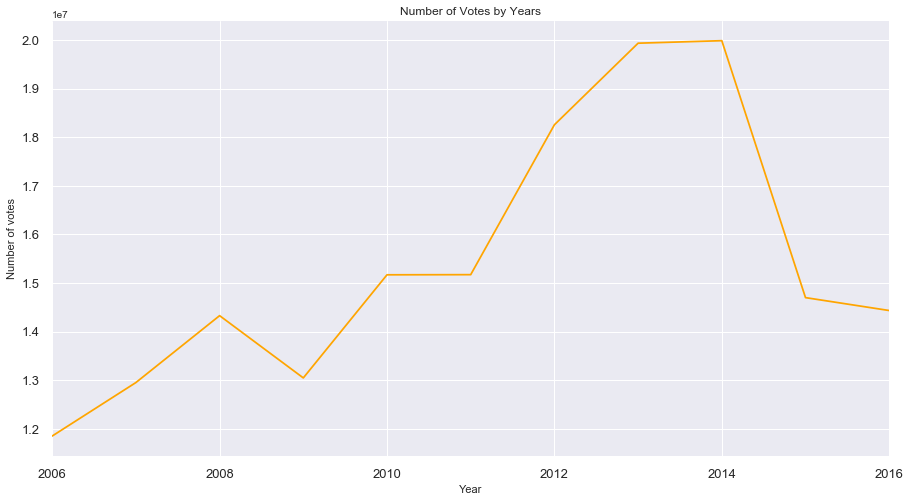

In [43]:
#Number of votes over the years
moviesdf.groupby(['Year'])['Votes'].sum().plot(kind='line', figsize=(15,8), fontsize=13, color='orange')
plt.ylabel('Number of votes')
plt.title("Number of Votes by Years")

- The number of votes have increaed from 2006 to 2016, but no in linear trend as we understood, the number of votes in 2016 are less when compared from 2012-2015.
- 2013-2014 have highest number of votes. 

In [44]:
moviesdf.groupby(['Year'])['Votes'].mean()

Year
2006    269289.954545
2007    244331.037736
2008    275505.384615
2009    255780.647059
2010    252782.316667
2011    240790.301587
2012    285226.093750
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016    48591.754209 
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Average number of Votes by Years')

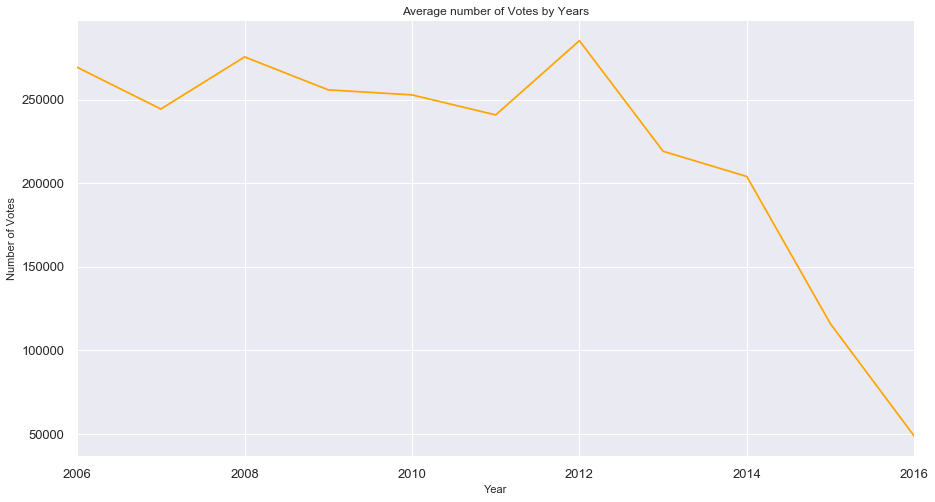

In [45]:
#Average number of votes over the years
moviesdf.groupby(['Year'])['Votes'].mean().plot(kind='line', figsize=(15,8), fontsize=13, color='orange')
plt.ylabel('Number of Votes')
plt.title("Average number of Votes by Years")

- The average number of votes have reduced gradually over the years , could be due to number of movies releasing over the years have increaed resulting in reducing the average votes.

Text(0, 0.5, 'Number of Votes')

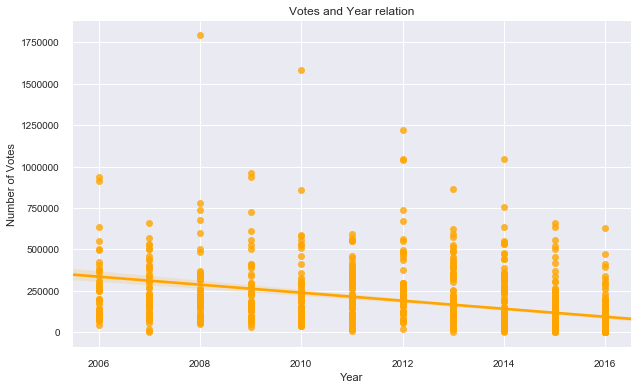

In [46]:
plt.figure(figsize=(10,6))
plt.title("Votes and Year relation")
sns.regplot(data=moviesdf, x="Year", y="Votes", color='orange')
plt.ylabel("Number of Votes")

The above graph we can see the trend is going down with year and votes.

- From the above 3 graphs we observe following
 - The number of votes were maximum in 2013-2014
 - The avearge number of votes decreaed due to increase in number of movies releasing over the years.

<a id=section510></a>
### **5.10 Distribution of ratings for movies for different years and its relationship**

In [47]:
moviesdf.groupby(['Year'])['Rating'].count()

Year
2006    44 
2007    53 
2008    52 
2009    51 
2010    60 
2011    63 
2012    64 
2013    91 
2014    98 
2015    127
2016    297
Name: Rating, dtype: int64

In [48]:
moviesdf.groupby(['Year'])['Rating'].mean()

Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Average Ratings by Years')

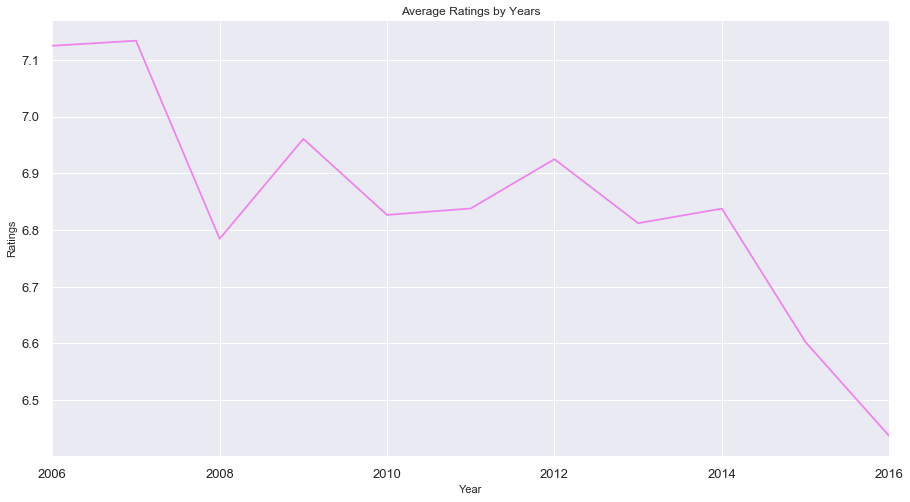

In [49]:
#Average ratings over the years
moviesdf.groupby(['Year'])['Rating'].mean().plot(kind='line', figsize=(15,8), fontsize=13, color='violet')
plt.ylabel('Ratings')
plt.title("Average Ratings by Years")

Text(0, 0.5, 'Ratings')

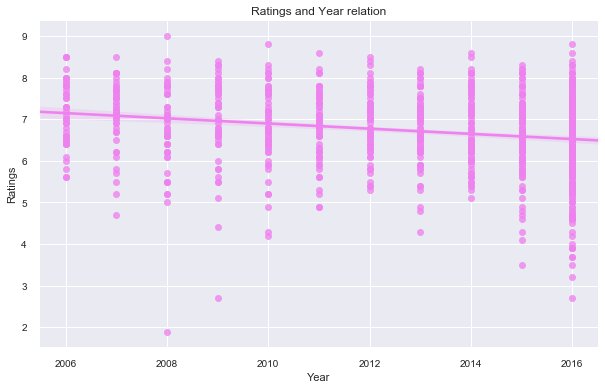

In [50]:
plt.figure(figsize=(10,6))
plt.title("Ratings and Year relation")
sns.regplot(data=moviesdf, x="Year", y="Rating", color='violet')
plt.ylabel("Ratings")

- The average ratings have been decreased over the years




<a id=section50111></a>
### **5.11 Distribution of metascores for movies for different years and its relationship**

In [51]:
#Drop the rows with missing metascore values
metamoviedf=moviesdf.dropna(subset=['Metascore'])

In [52]:
metamoviedf.groupby(['Year'])['Metascore'].mean()

Year
2006    64.414634
2007    64.500000
2008    57.408163
2009    57.122449
2010    59.389831
2011    61.724138
2012    61.145161
2013    58.534884
2014    57.315789
2015    57.040650
2016    58.283582
Name: Metascore, dtype: float64

Text(0.5, 1.0, 'Average Metascore by Years')

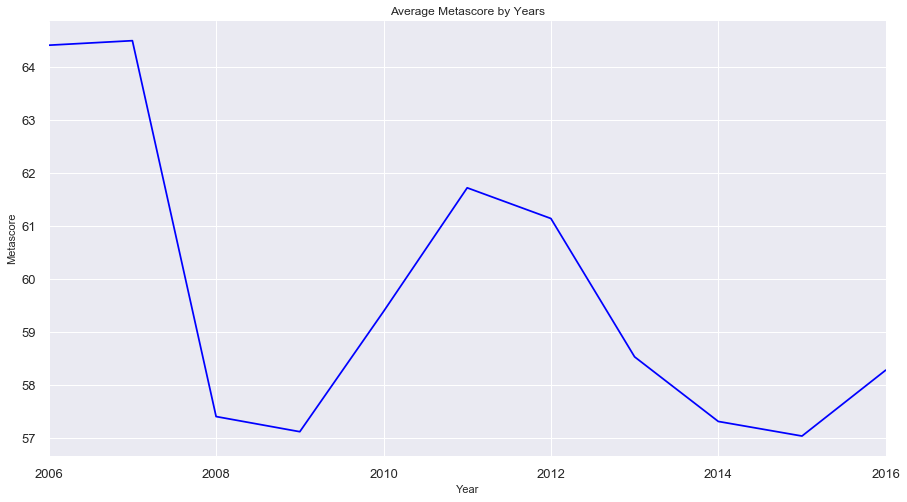

In [53]:
#Average Metascore over the years
metamoviedf.groupby(['Year'])['Metascore'].mean().plot(kind='line', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Metascore')
plt.title("Average Metascore by Years")

Text(0, 0.5, 'Metascore')

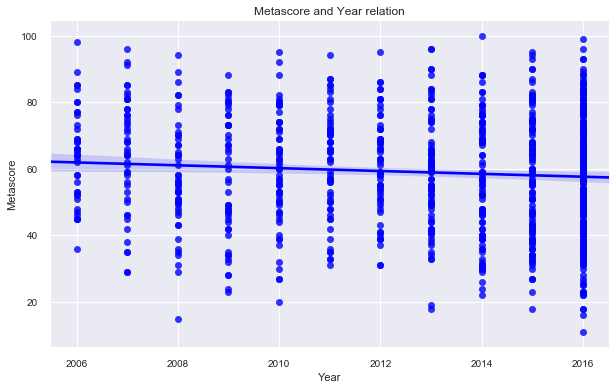

In [54]:
plt.figure(figsize=(10,6))
plt.title("Metascore and Year relation")
sns.regplot(data=metamoviedf, x="Year", y="Metascore", color='blue')
plt.ylabel("Metascore")

- The average metascore for the movies have decreased over the years but not in linear trend.

<a id=section512></a>
### **5.12 Movies with highest rating over the year**

In [55]:
tmp=moviesdf.sort_values(by=['Rating'], ascending=False).groupby('Year').first()
tmp.groupby(['Title','Year'])['Rating'].mean()

Title                    Year
3 Idiots                 2009    8.4
Bahubali: The Beginning  2015    8.3
Dangal                   2016    8.8
Inception                2010    8.8
Interstellar             2014    8.6
Taare Zameen Par         2007    8.5
The Dark Knight          2008    9.0
The Dark Knight Rises    2012    8.5
The Intouchables         2011    8.6
The Prestige             2006    8.5
The Wolf of Wall Street  2013    8.2
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Highest rated movies by years')

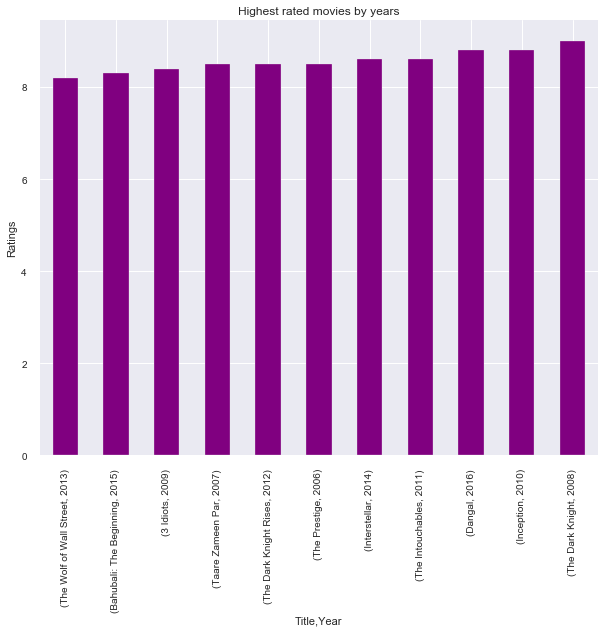

In [57]:
tmp=moviesdf.sort_values(by=['Rating'], ascending=False).groupby('Year').first()
tmp.groupby(['Title','Year'])['Rating'].mean().sort_values().plot.bar(x='Title', y='Rating', figsize=(10,8), color='purple')
plt.ylabel('Ratings')
plt.title("Highest rated movies by years")

- The Dark Knight is the highest rated movie, but the ratings of highest rated movies across the years dont have much difference.

- Also, the ratings are not depedent on the year.

<a id=section513></a>
### **5.13 Movies with highest metacore over the year**

In [58]:
tmp=metamoviedf.sort_values(by=['Metascore'], ascending=False).groupby('Year').first()
tmp.groupby(['Title','Year'])['Metascore'].mean()

Title               Year
12 Years a Slave    2013    96.0 
Boyhood             2014    100.0
Carol               2015    95.0 
Megan Is Missing    2011    94.0 
Moonlight           2016    99.0 
Pan's Labyrinth     2006    98.0 
Ratatouille         2007    96.0 
The Hurt Locker     2008    94.0 
The Social Network  2010    95.0 
Up                  2009    88.0 
Zero Dark Thirty    2012    95.0 
Name: Metascore, dtype: float64

Text(0.5, 1.0, 'Highest Metascore movies by years')

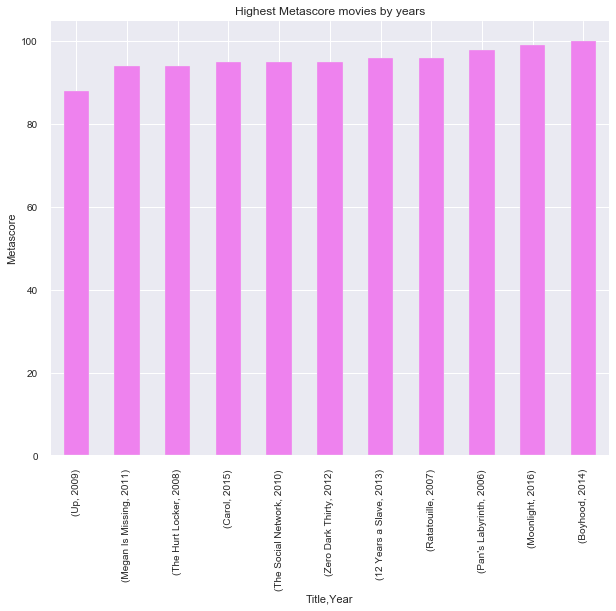

In [59]:
tmp=metamoviedf.sort_values(by=['Metascore'], ascending=False).groupby('Year').first()
tmp.groupby(['Title','Year'])['Metascore'].mean().sort_values().plot.bar(x='Title', y='Metascore', figsize=(10,8), color='violet')
plt.ylabel('Metascore')
plt.title("Highest Metascore movies by years")

- Boyhood has highest metascore, like the ratings mesatscore also not have much difference for the top movies across the year apart from "Up in 2009" which has score much less than other movies

- Also, the metascores are not depedent on the year.

<a id=section514></a>
### **5.14 How Revenue and Votes are related**

Text(0, 0.5, 'Votes')

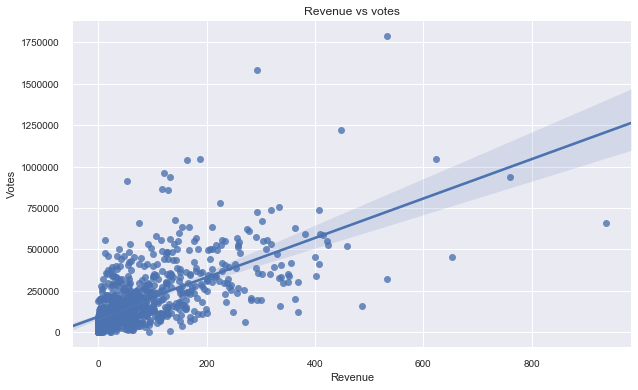

In [60]:
plt.figure(figsize=(10,6))
plt.title("Revenue vs votes")
sns.regplot(data=revmoviesdf, x="Revenue", y="Votes")
plt.ylabel("Votes")

- Most of the movies around 100-150 million have votes under 250000
- But we can observe the movies earning high have votes more than 250000.
- The movies withn votes with more than 500000 have earned generally more than 500 million apart from few exceptions.
- We have exceptions which earned 800 million or more.

<a id=section515></a>
### **5.15 How Revenue and Ratings are related**

Text(0, 0.5, 'Rating')

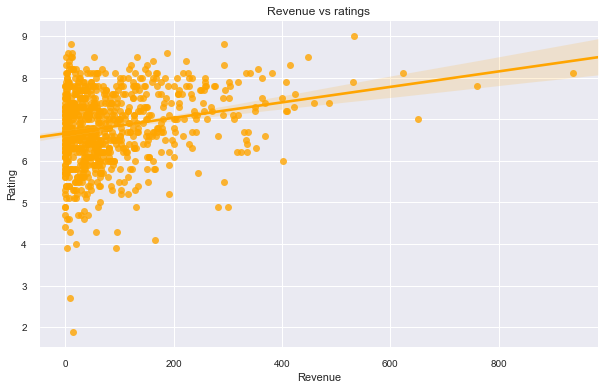

In [61]:
plt.figure(figsize=(10,6))
plt.title("Revenue vs ratings")
sns.regplot(data=revmoviesdf, x="Revenue", y="Rating", color='orange')
plt.ylabel("Rating")

- Most of the movies have earned around 150 million and have different ratings.
- Not quite clear trend, but most of the movies earning more than 400 million have ratings more than 7.

<a id=section516></a>
### **5.16 How Revenue and Metascores are related**

In [62]:
tmp=moviesdf.dropna(subset=['Revenue','Metascore'])

Text(0, 0.5, 'Metascore')

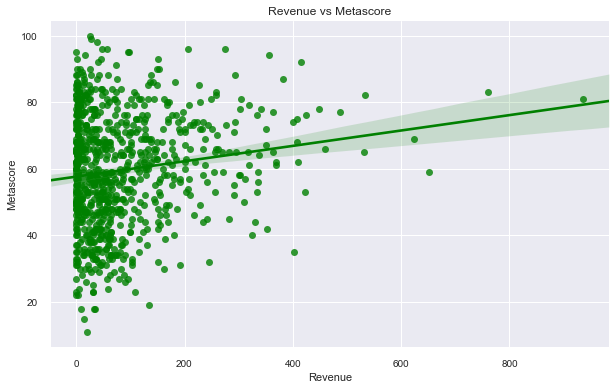

In [63]:
plt.figure(figsize=(10,6))
plt.title("Revenue vs Metascore")
sns.regplot(data=tmp, x="Revenue", y="Metascore", color='green')
plt.ylabel("Metascore")

 - No clear relationship trend observed between metascore and revenue, but the movies earning more than 400 million have generally score more than 60. 

<a id=section517></a>
### **5.17 How Duration of Movie affects Revenue**

Text(0, 0.5, 'Runtime')

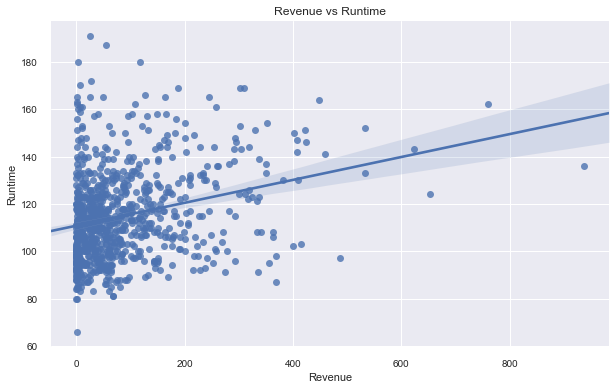

In [64]:
plt.figure(figsize=(10,6))
plt.title("Revenue vs Runtime")
sns.regplot(data=revmoviesdf, x="Revenue", y="Runtime")
plt.ylabel("Runtime")

- No relationship, but the high earning movies mostly have run-time between 100-140 minutes.

<a id=section518></a>
### **5.18 Relationship between Ratings and Votes**

Text(0, 0.5, 'Votes')

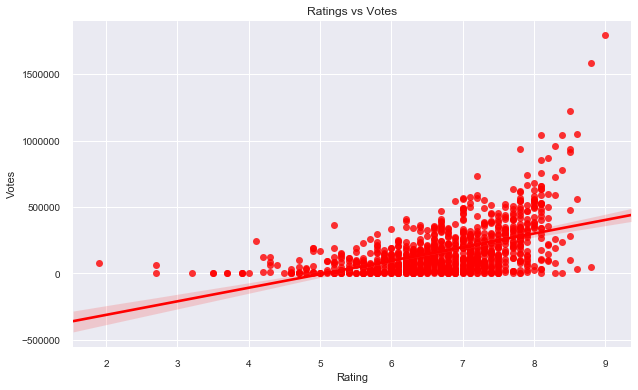

In [65]:
plt.figure(figsize=(10,6))
plt.title("Ratings vs Votes")
sns.regplot(data=moviesdf, x="Rating", y="Votes", color='red')
plt.ylabel("Votes")

 - No relationship between ratings and votes, as some movies with high ratings of more than 8 have low vote count

<a id=section519></a>
### **5.19 Relationship between Metascores and Votes**

Text(0, 0.5, 'Votes')

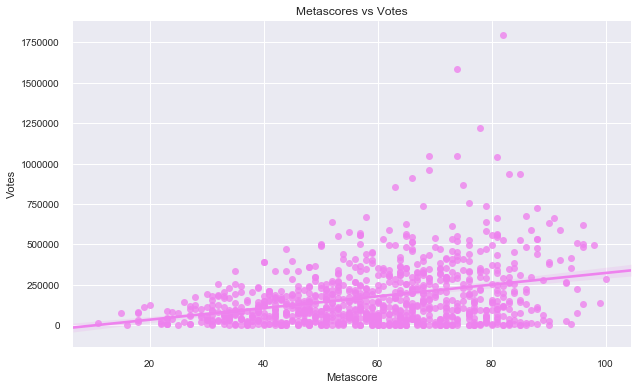

In [66]:
plt.figure(figsize=(10,6))
plt.title("Metascores vs Votes")
sns.regplot(data=metamoviedf, x="Metascore", y="Votes", color='violet')
plt.ylabel("Votes")

 - We can observe no relationship between Metascores and Votes as movies with good score of more than 80 have low vote count

<a id=section520></a>
### **5.20 Relationship between Ratings and Metascores**

Text(0, 0.5, 'Rating')

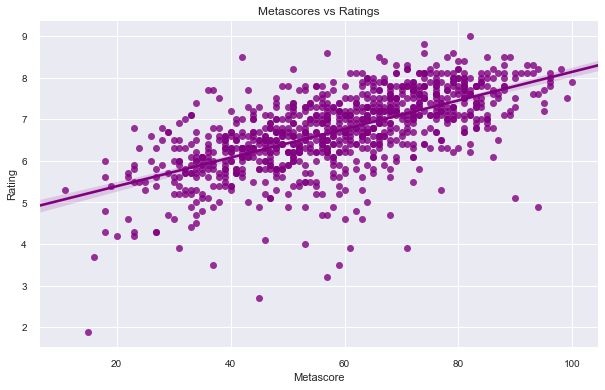

In [67]:
plt.figure(figsize=(10,6))
plt.title("Metascores vs Ratings")
sns.regplot(data=metamoviedf, x="Metascore", y="Rating", color='purple')
plt.ylabel("Rating")

 - We can observe the linear trend between ratings and metascores, the scores increasing along with the ratings with few exceptions.

<a id=section521></a>
### **5.21 Relationship between Revenue and Genre**

In [169]:
#get genre list sorted by revenue and stored in the list
genre_list=moviesdf.sort_values(by='Revenue', ascending=False).Genre
genre_list

50     Action,Adventure,Fantasy
87     Action,Adventure,Fantasy
85     Action,Adventure,Sci-Fi 
76     Action,Sci-Fi           
54     Action,Crime,Drama      
              ...              
977    Comedy                  
978    Drama                   
988    Horror                  
995    Crime,Drama,Mystery     
998    Adventure,Comedy        
Name: Genre, Length: 1000, dtype: object

In [170]:
#using counter to count the occurence of each unique genre element in the list genrated above.
from collections import Counter 

genlist=[]
for genre in genre_list:
  tmp=[]
  tmp=genre.split(',')
  genlist.extend(tmp)
  
#print(genlist)

mycounter=Counter(genlist)
print(mycounter)

#print(mycounter.keys())
#print(mycounter.values())

Counter({'Drama': 513, 'Action': 303, 'Comedy': 279, 'Adventure': 259, 'Thriller': 195, 'Crime': 150, 'Romance': 141, 'Sci-Fi': 120, 'Horror': 119, 'Mystery': 106, 'Fantasy': 101, 'Biography': 81, 'Family': 51, 'Animation': 49, 'History': 29, 'Sport': 18, 'Music': 16, 'War': 13, 'Western': 7, 'Musical': 5})


In [171]:
#Empty dictionary
genre_dict=dict.fromkeys(genlist,0)
print(genre_dict)

#print(type(genre_dict.keys()))
#print(type(genre_dict.values()))

{'Action': 0, 'Adventure': 0, 'Fantasy': 0, 'Sci-Fi': 0, 'Crime': 0, 'Drama': 0, 'Animation': 0, 'Comedy': 0, 'Thriller': 0, 'Mystery': 0, 'Family': 0, 'Biography': 0, 'Horror': 0, 'Sport': 0, 'War': 0, 'Romance': 0, 'Music': 0, 'History': 0, 'Western': 0, 'Musical': 0}


In [71]:
#Traversing dataframe and storing data in dictionary, key-genre, value-total revenue for genre calcualted over the years
genredict=dict()
for idx in moviesdf.index:
  if (moviesdf['Revenue'][idx]>=0):
    if moviesdf['Genre'][idx] in genredict:
      genredict[moviesdf['Genre'][idx]]+=moviesdf['Revenue'][idx]
    else:
       genredict[moviesdf['Genre'][idx]]=moviesdf['Revenue'][idx]

for k,v in genre_dict.items():
  for key, val in genredict.items():
    tmplist=[]
    tmplist.extend(key.split(','))
    if (k in tmplist):
      genre_dict[k]+=val

for k,v in genre_dict.items():
  print ("Genre : {}, Revenue : {}".format(k,v))

Genre : Action, Revenue : 35605.420000000006
Genre : Adventure, Revenue : 38852.610000000015
Genre : Fantasy, Revenue : 12262.06
Genre : Sci-Fi, Revenue : 14910.780000000006
Genre : Crime, Revenue : 8034.620000000003
Genre : Drama, Revenue : 21931.450000000004
Genre : Animation, Revenue : 8987.500000000002
Genre : Comedy, Revenue : 19316.45000000001
Genre : Thriller, Revenue : 10645.319999999998
Genre : Mystery, Revenue : 4861.859999999998
Genre : Family, Revenue : 6182.609999999999
Genre : Biography, Revenue : 4185.119999999999
Genre : Horror, Revenue : 3413.5899999999997
Genre : Sport, Revenue : 1040.6799999999998
Genre : War, Revenue : 534.33
Genre : Romance, Revenue : 5482.889999999998
Genre : Music, Revenue : 706.0500000000001
Genre : History, Revenue : 1376.02
Genre : Western, Revenue : 559.12
Genre : Musical, Revenue : 408.21


In [72]:
list(genre_dict.keys())

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Animation',
 'Comedy',
 'Thriller',
 'Mystery',
 'Family',
 'Biography',
 'Horror',
 'Sport',
 'War',
 'Romance',
 'Music',
 'History',
 'Western',
 'Musical']

In [73]:
tuple(genre_dict.values())

(35605.420000000006,
 38852.610000000015,
 12262.06,
 14910.780000000006,
 8034.620000000003,
 21931.450000000004,
 8987.500000000002,
 19316.45000000001,
 10645.319999999998,
 4861.859999999998,
 6182.609999999999,
 4185.119999999999,
 3413.5899999999997,
 1040.6799999999998,
 534.33,
 5482.889999999998,
 706.0500000000001,
 1376.02,
 559.12,
 408.21)

In [74]:
fig = go.Figure([go.Bar(x=list(genre_dict.keys()), y=tuple(genre_dict.values()))])

fig.update_layout(
    title="Genre with highest revneue",
    xaxis_title="Genre",
    yaxis_title="Revenue(in Millions USD)")

fig.show()


- From the above graph, understood that Adventure genre has earned most revenue followed by Action.
- Sports,War,Music,Western genre has not made much revneue

<a id=section522></a>
### **5.22 Revenue distribution for each genre over the year**

In [119]:
#Getting unique year from the list from above section
yeararr=revmoviesdf['Year'].unique()
yeararr=np.sort(yeararr)
yeararr

first=True

#for each year, we are traversing the genre element in each movie and storing the revenue generated by each element along 
#with genre element in a dictionary and further creating dataframe from the dictionary
for year in yeararr:
    genrevdict=dict()
    genrevdict=dict.fromkeys(genlist,0)
    genrevdict['Year']=year
    
    tmpdf=revmoviesdf[revmoviesdf['Year']==year]

    total=0
    for idx in tmpdf.index:
        revlist=[]
        revlist=tmpdf['Genre'][idx].split(',')
        for genre in revlist:
            if genre in genrevdict.keys():
                genrevdict[genre]+=tmpdf['Revenue'][idx]
            else:
                   genrevdict[genre]=tmpdf['Revenue'][idx]
        total+=tmpdf['Revenue'][idx]
        genrevdict["Total"]=total

    if (first==True):
        revenuedf=pd.DataFrame(genrevdict, index=[0])
        first=False
    else:
         revenuedf=revenuedf.append(genrevdict, ignore_index=True)
            
revenuedf  

Action  Adventure  Fantasy   Sci-Fi    Crime    Drama  Animation  \
0   1664.01  1599.32    950.08   306.79   407.34   1252.42  442.04      
1   1661.74  1686.06    921.95   649.27   548.23   1414.00  416.31      
2   3150.48  1755.28    948.45   713.59   1077.89  2049.29  439.21      
3   2694.44  3230.11    1244.57  1276.60  571.25   1294.69  493.63      
4   2711.38  3815.60    1344.06  828.70   444.02   1706.45  1233.02     
5   2451.38  2837.01    1317.15  1422.12  651.74   1942.48  335.07      
6   2950.70  3106.40    1164.58  1378.82  444.26   2144.33  426.69      
7   3371.91  4050.24    1280.98  1556.08  1217.40  1793.10  1037.28     
8   5115.32  4640.62    496.18   2610.27  832.04   2727.20  707.40      
9   4775.42  5442.81    1273.72  2207.14  932.17   2481.20  1039.51     
10  5058.64  6689.16    1320.34  1961.40  908.28   3126.29  2417.34     

     Comedy  Thriller  Mystery   Family  Biography  Horror   Sport     War  \
0   916.04   816.73    510.69   197.99   184.03     98.73   220.82  248.21   
1   927.04   806.11    458.14   936.83   188.96     521.14  0.00    0.00     
2   929.31   712.85    189.42   367.51   62.77      132.63  24.85   51.75    
3   1311.28  439.77    202.37   441.39   389.82     209.27  255.95  120.52   
4   1904.30  606.29    335.36   958.52   347.62     191.53  0.00    6.86     
5   1307.47  973.98    488.55   211.97   88.79      80.76   89.26   0.00     
6   1852.45  1627.05   405.25   49.00    318.22     274.48  0.00    0.00     
7   2153.56  1396.93   891.75   303.46   754.84     734.77  95.00   0.00     
8   1657.63  745.33    642.58   508.00   682.68     136.59  115.60  85.71    
9   2366.22  1575.81   210.07   850.96   433.63     200.04  225.43  18.70    
10  3991.15  944.47    527.68   1356.98  733.76     833.65  13.77   2.58     

    Romance   Music  History  Western  Musical    Year     Total  
0   168.31   65.27   15.96    0.00     0.00     2006.0  3624.46   
1   290.10   32.86   73.27    0.00     77.22    2007.0  4306.23   
2   877.13   58.01   42.51    0.00     143.70   2008.0  5053.22   
3   447.96   0.00    0.00     0.00     0.00     2009.0  5292.26   
4   299.79   0.00    0.00     171.03   0.00     2010.0  5989.65   
5   758.17   51.78   0.00     0.00     0.00     2011.0  5431.96   
6   616.93   65.00   413.94   162.80   187.29   2012.0  6910.29   
7   400.33   16.17   56.67    89.29    0.00     2013.0  7666.72   
8   575.68   63.55   52.07    42.62    0.00     2014.0  7997.40   
9   548.76   189.73  312.28   0.00     0.00     2015.0  8854.12   
10  499.73   163.68  409.32   93.38    0.00     2016.0  11211.65

Current size: [15.0, 10.0]


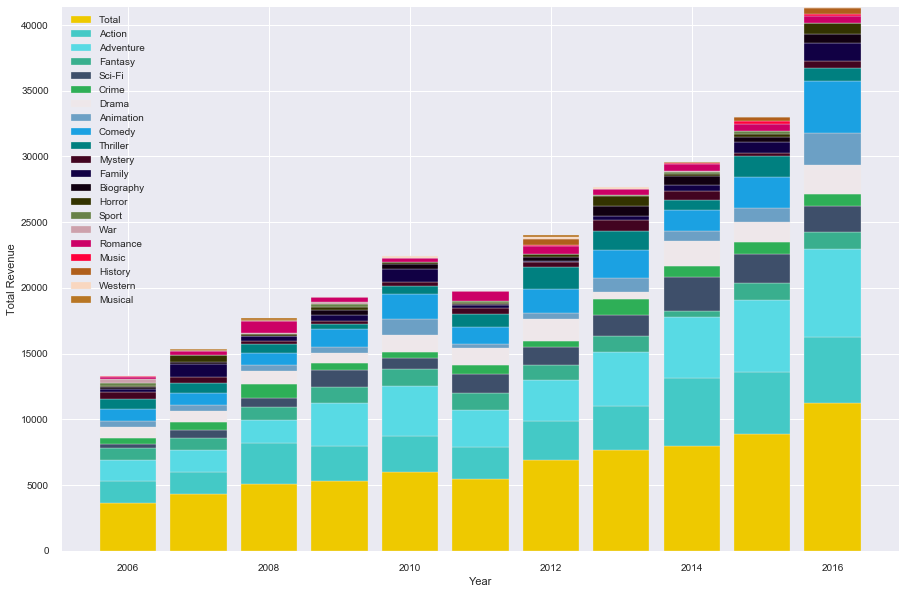

In [168]:
year=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]


g1=revenuedf.groupby(['Year'])['Total'].sum().array
g2=revenuedf.groupby(['Year'])['Action'].sum().array
g3=revenuedf.groupby(['Year'])['Adventure'].sum().array
g4=revenuedf.groupby(['Year'])['Fantasy'].sum().array
g5=revenuedf.groupby(['Year'])['Sci-Fi'].sum().array
g6=revenuedf.groupby(['Year'])['Crime'].sum().array
g7=revenuedf.groupby(['Year'])['Drama'].sum().array
g8=revenuedf.groupby(['Year'])['Animation'].sum().array
g9=revenuedf.groupby(['Year'])['Comedy'].sum().array
g10=revenuedf.groupby(['Year'])['Thriller'].sum().array
g11=revenuedf.groupby(['Year'])['Mystery'].sum().array
g12=revenuedf.groupby(['Year'])['Family'].sum().array
g13=revenuedf.groupby(['Year'])['Biography'].sum().array
g14=revenuedf.groupby(['Year'])['Horror'].sum().array
g15=revenuedf.groupby(['Year'])['Sport'].sum().array
g16=revenuedf.groupby(['Year'])['War'].sum().array
g17=revenuedf.groupby(['Year'])['Romance'].sum().array
g18=revenuedf.groupby(['Year'])['Music'].sum().array
g19=revenuedf.groupby(['Year'])['History'].sum().array
g20=revenuedf.groupby(['Year'])['Western'].sum().array
g21=revenuedf.groupby(['Year'])['Musical'].sum().array

plt.bar(year, g1, color = '#eec900')
plt.bar(year, g2, color = '#44c9c6', bottom=g1)
plt.bar(year, g3, color = '#58dae4', bottom=g1+g2)
plt.bar(year, g4, color = '#39af8e', bottom=g1+g2+g3)
plt.bar(year, g5, color = '#3e4f6a', bottom=g1+g2+g3+g4)
plt.bar(year, g6, color = '#2eaf57', bottom=g1+g2+g3+g4+g5)
plt.bar(year, g7, color = '#eee7ea', bottom=g1+g2+g3+g4+g5+g6)
plt.bar(year, g8, color = '#6ca0c5', bottom=g1+g2+g3+g4+g5+g7)
plt.bar(year, g9, color = '#1ba1e2', bottom=g1+g2+g3+g4+g5+g7+g8)
plt.bar(year, g10, color = '#008080', bottom=g1+g2+g3+g4+g5+g7+g8+g9)
plt.bar(year, g11, color = '#420420', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10)
plt.bar(year, g12, color = '#110044', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11)
plt.bar(year, g13, color = '#110011', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12)
plt.bar(year, g14, color = '#333300', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13)
plt.bar(year, g15, color = '#688248', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13+g14)
plt.bar(year, g16, color = '#cda1ac', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13+g14+g15)
plt.bar(year, g17, color = '#cc0066', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13+g14+g15+g16)
plt.bar(year, g18, color = '#ff003c', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13+g14+g15+g16+g17)
plt.bar(year, g19, color = '#b05f1b', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13+g14+g15+g16+g17+g18)
plt.bar(year, g20, color = '#f9d7c0', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13+g14+g15+g16+g17+g18+g19)
plt.bar(year, g21, color = '#b87624', bottom=g1+g2+g3+g4+g5+g7+g8+g9+g10+g11+g12+g13+g14+g15+g16+g17+g18+g19+g20)


plt.legend(labels=('Total', 'Action', 'Adventure','Fantasy', 'Sci-Fi', 'Crime', 'Drama', 'Animation', 'Comedy', 'Thriller',
                  'Mystery', 'Family', 'Biography', 'Horror', 'Sport', 'War', 'Romance', 'Music', 'History', 'Western', 'Musical'))
plt.xlabel("Year")
plt.ylabel("Total Revenue")

fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()

- From the above graph of revenue distribution for each year, we can observe that Action and Adventure genre has earned most of the revenue followed by Comedy genre.

<a id=section523></a>
### **5.23 Director-wise revenue**

In [75]:
revmoviesdf.groupby(['Director'])['Revenue'].sum().sort_values(ascending=False)

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
                      ...   
So Yong Kim          0.01   
Robin Swicord        0.01   
Patricia Rozema      0.01   
Phillip Guzman       0.01   
Andy Goddard         0.00   
Name: Revenue, Length: 540, dtype: float64

Text(0.5, 1.0, 'Director-wise revenue')

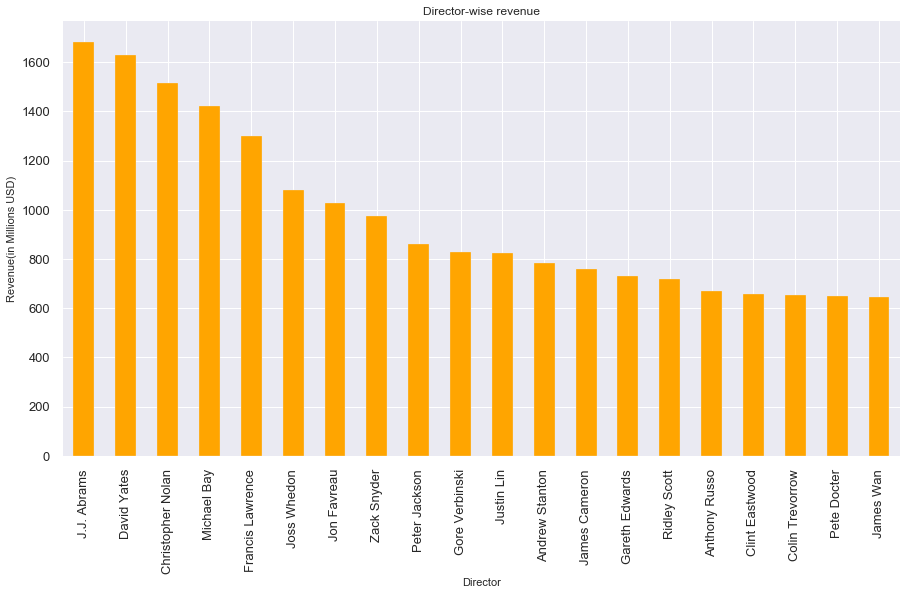

In [76]:
revmoviesdf.groupby(['Director'])['Revenue'].sum().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15,8), fontsize=13, color='orange')
plt.ylabel('Revenue(in Millions USD)')
plt.title("Director-wise revenue")

- We can observe that JJ Abrams directed movie has generared maximum revenue followed by movies direced by David yates and Christopher Nolan 

In [77]:
revmoviesdf[revmoviesdf['Director']=='J.J. Abrams']

Rank                                       Title  \
50   51    Star Wars: Episode VII - The Force Awakens   
140  141   Star Trek                                    
362  363   Star Trek Into Darkness                      
497  498   Super 8                                      
869  870   Mission: Impossible III                      

                         Genre     Director  \
50   Action,Adventure,Fantasy   J.J. Abrams   
140  Action,Adventure,Sci-Fi    J.J. Abrams   
362  Action,Adventure,Sci-Fi    J.J. Abrams   
497  Mystery,Sci-Fi,Thriller    J.J. Abrams   
869  Action,Adventure,Thriller  J.J. Abrams   

                                                                 Actors  Year  \
50   Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson            2015   
140  Chris Pine, Zachary Quinto, Simon Pegg, Leonard Nimoy               2009   
362  Chris Pine, Zachary Quinto, Zoe Saldana, Benedict Cumberbatch       2013   
497  Elle Fanning, AJ Michalka, Kyle Chandler, Joel Courtney             2011   
869  Tom Cruise, Michelle Monaghan, Ving Rhames, Philip Seymour Hoffman  2006   

     Runtime  Rating   Votes  Revenue  Metascore  
50   136      8.1     661608  936.63   81.0       
140  127      8.0     526324  257.70   82.0       
362  132      7.8     417663  228.76   72.0       
497  112      7.1     298913  126.98   72.0       
869  126      6.9     270429  133.38   66.0

In [78]:
revmoviesdf[revmoviesdf['Director']=='David Yates']

Rank                                         Title  \
10   11    Fantastic Beasts and Where to Find Them        
107  108   The Legend of Tarzan                           
114  115   Harry Potter and the Deathly Hallows: Part 2   
314  315   Harry Potter and the Order of the Phoenix      
418  419   Harry Potter and the Deathly Hallows: Part 1   
473  474   Harry Potter and the Half-Blood Prince         

                        Genre     Director  \
10   Adventure,Family,Fantasy  David Yates   
107  Action,Adventure,Drama    David Yates   
114  Adventure,Drama,Fantasy   David Yates   
314  Adventure,Family,Fantasy  David Yates   
418  Adventure,Family,Fantasy  David Yates   
473  Adventure,Family,Fantasy  David Yates   

                                                                     Actors  \
10   Eddie Redmayne, Katherine Waterston, Alison Sudol,Dan Fogler             
107  Alexander Skarsgård, Rory J. Saper, Christian Stevens, Christoph Waltz   
114  Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon              
314  Daniel Radcliffe, Emma Watson, Rupert Grint, Brendan Gleeson             
418  Daniel Radcliffe, Emma Watson, Rupert Grint, Bill Nighy                  
473  Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon              

     Year  Runtime  Rating   Votes  Revenue  Metascore  
10   2016  133      7.5     232072  234.02   66.0       
107  2016  110      6.3     117590  126.59   44.0       
114  2011  130      8.1     590595  380.96   87.0       
314  2007  138      7.5     385325  292.00   71.0       
418  2010  146      7.7     357213  294.98   65.0       
473  2009  153      7.5     351059  301.96   78.0

In [79]:
revmoviesdf[revmoviesdf['Director']=='Christopher Nolan']

Rank                  Title                    Genre           Director  \
36   37    Interstellar           Adventure,Drama,Sci-Fi   Christopher Nolan   
54   55    The Dark Knight        Action,Crime,Drama       Christopher Nolan   
64   65    The Prestige           Drama,Mystery,Sci-Fi     Christopher Nolan   
80   81    Inception              Action,Adventure,Sci-Fi  Christopher Nolan   
124  125   The Dark Knight Rises  Action,Thriller          Christopher Nolan   

                                                                  Actors  \
36   Matthew McConaughey, Anne Hathaway, Jessica Chastain, Mackenzie Foy   
54   Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine             
64   Christian Bale, Hugh Jackman, Scarlett Johansson, Michael Caine       
80   Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe     
124  Christian Bale, Tom Hardy, Anne Hathaway,Gary Oldman                  

     Year  Runtime  Rating    Votes  Revenue  Metascore  
36   2014  169      8.6     1047747  187.99   74.0       
54   2008  152      9.0     1791916  533.32   82.0       
64   2006  130      8.5     913152   53.08    66.0       
80   2010  148      8.8     1583625  292.57   74.0       
124  2012  164      8.5     1222645  448.13   78.0

<a id=section524></a>
### **5.24 Directors with higest votes**

In [80]:
moviesdf.groupby(['Director'])['Votes'].sum().sort_values(ascending=False)[:20]

Director
Christopher Nolan    6559085
Martin Scorsese      2966524
Quentin Tarantino    2559586
David Fincher        2309652
Zack Snyder          2301544
J.J. Abrams          2174937
Ridley Scott         2080074
David Yates          2033854
Michael Bay          1706531
Peter Jackson        1698695
Matthew Vaughn       1667633
Jon Favreau          1644598
Francis Lawrence     1625649
Joss Whedon          1562483
Danny Boyle          1384167
David O. Russell     1331187
Clint Eastwood       1293485
Guy Ritchie          1265274
Gore Verbinski       1253896
Denis Villeneuve     1219634
Name: Votes, dtype: int64

Text(0.5, 1.0, 'Directors with maximum votes received')

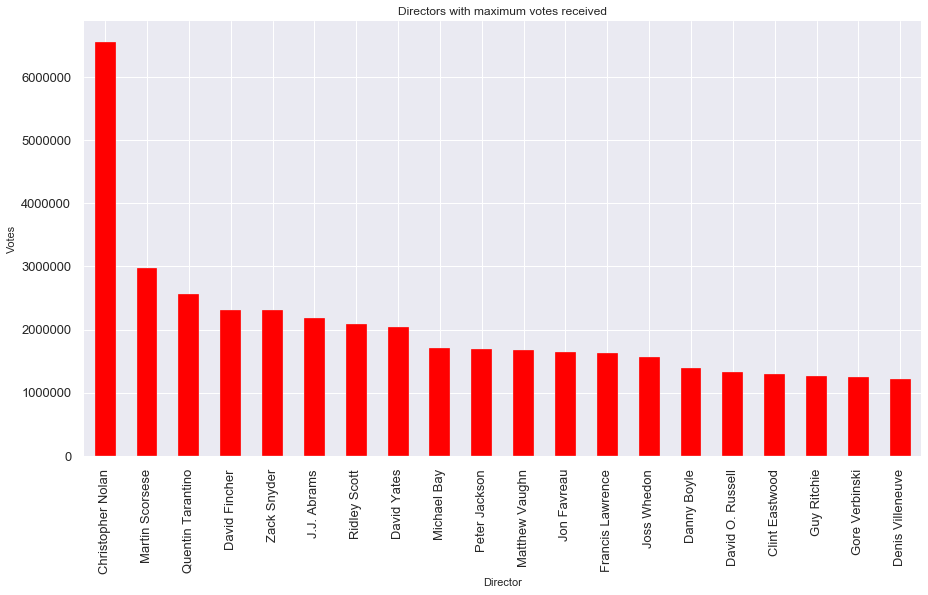

In [81]:
moviesdf.groupby(['Director'])['Votes'].sum().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15,8), fontsize=13, color='red')
plt.ylabel('Votes')
plt.title("Directors with maximum votes received")

<a id=section525></a>
### **5.25 Directors with higest ratings**

In [82]:
moviesdf.groupby(['Director'])['Rating'].mean().sort_values(ascending=False)[:20]

Director
Nitesh Tiwari                       8.80
Christopher Nolan                   8.68
Makoto Shinkai                      8.60
Olivier Nakache                     8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
Naoko Yamada                        8.40
Damien Chazelle                     8.40
Lee Unkrich                         8.30
S.S. Rajamouli                      8.30
Amber Tamblyn                       8.30
Rajkumar Hirani                     8.30
Thomas Vinterberg                   8.30
Pete Docter                         8.25
Juan José Campanella                8.20
Lenny Abrahamson                    8.20
Byron Howard                        8.10
Chan-wook Park                      8.10
Tom McCarthy                        8.10
Garth Davis                         8.10
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Directors with maximum Ratings received')

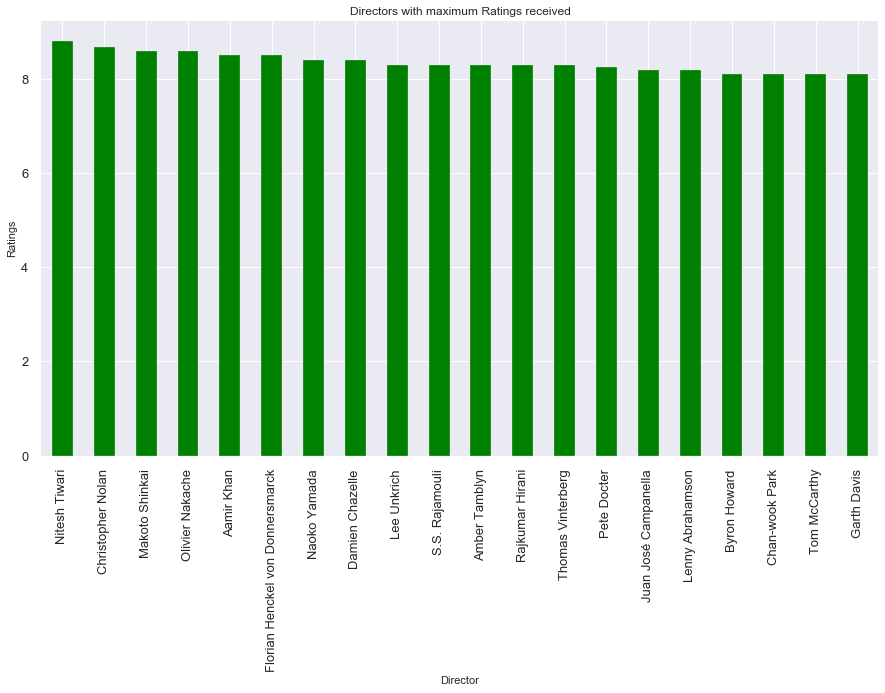

In [83]:
moviesdf.groupby(['Director'])['Rating'].mean().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15,8), fontsize=13, color='green')
plt.ylabel('Ratings')
plt.title("Directors with maximum Ratings received")

<a id=section526></a>
### **5.26 Directors with higest metascores**

In [84]:
metamoviedf.groupby(['Director'])['Metascore'].mean().sort_values(ascending=False)[:20]

Director
Barry Jenkins                       99.0
Kenneth Lonergan                    96.0
Todd Haynes                         95.0
Kathryn Bigelow                     94.5
Michael Goi                         94.0
Maren Ade                           93.0
Tom McCarthy                        93.0
Lee Unkrich                         92.0
Richard Linklater                   91.5
Pete Docter                         91.0
Damien Chazelle                     90.5
Zackary Adler                       90.0
Spike Jonze                         90.0
Jim Jarmusch                        90.0
Alfonso Cuarón                      90.0
Paul Verhoeven                      89.0
Florian Henckel von Donnersmarck    89.0
Pascal Laugier                      89.0
Mia Hansen-Løve                     88.0
Abdellatif Kechiche                 88.0
Name: Metascore, dtype: float64

Text(0.5, 1.0, 'Directors with maximum Metascores received')

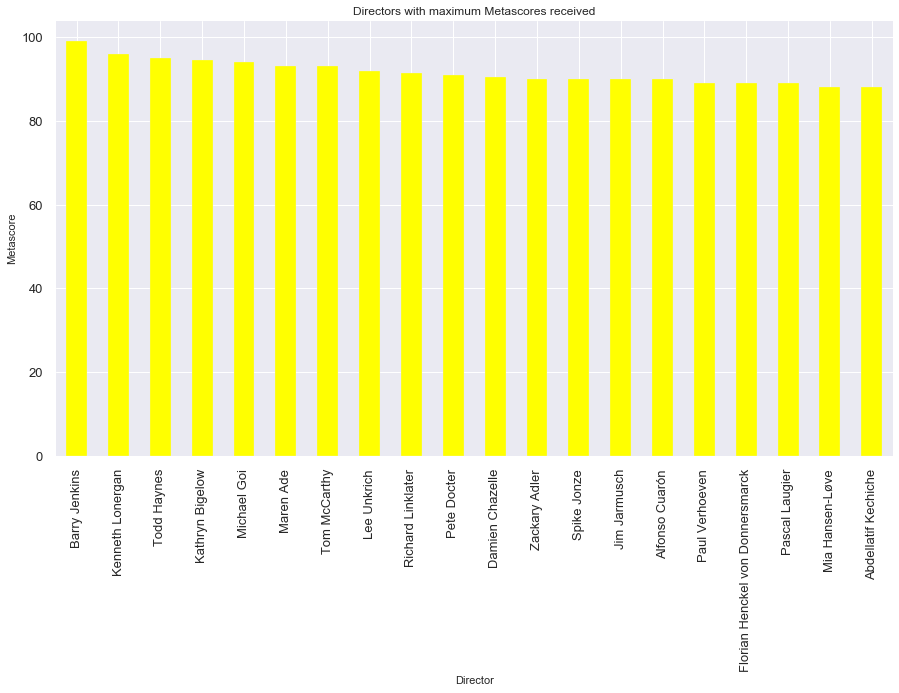

In [85]:
metamoviedf.groupby(['Director'])['Metascore'].mean().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15,8), fontsize=13, color='yellow')
plt.ylabel('Metascore')
plt.title("Directors with maximum Metascores received")

<a id=section6></a>
## 6. Conclusion

After analyzing the movies data, following is the conclusion of the observation-
 - Total revenue increased over the years but average revenue decreased
 - Number of movies increased increased over the years, which could be the reason in decreased average revenue
 - Movies with runtime, 100-120 have earned maximum revenue, so the movies which are too short or too long have not earned much revenue over the year.
 - Average number of votes decreased over the years, while maximum votes were between 2013-2014.
 - Ratings decreased over the years, but the ratings of individual movies are not dependent on the year.
 - The movies with highest metascores are not the same as the movies with highest ratings.
 - The movies with highest revenues are also not among the movies with highest ratings or metascores
 - No relationship of revenue with ratings,metascores or run-time, but few common values of high earning movies
   - Runtime - 100-140
   - Metascores-60
   - Ratings - 8
 - Votes by viewers are indepndent of ratings and metascores.
 - Adventure genre has earned most revenue over the years followed by Action, while War,Musical and Western genre are lowest earners.
 - The direcctors with highest earning movies have received high count of votes as well, but not have the high ratings or metascores.

<a id=section601></a>
### **6.1 Actionable insights**

- The number of movies releasing have increased considerably over the year.

- The total revenue has increased over the year, but due to large number of movies releasing, the average revenue is decreased.

- The ratings and metascores have been also decreased over the years.

- The revenue and ratings are not related to each other as observed from below-
    - The highest earning movies are not among the highest rated movies or movies with high metascores.    
    - The directors with with highest earning movies have not got favourable ratings and metascotres from critics, so the reviews by critics and audience have differed a lot.

- The movies with average run-time have been more successful when compared to movies with too long duration or too short duration.
- The movies with Action and Adventure genre have been more successful as comapred to other genres.
- Over the years, the movies with maximum revenue belongs to Action and Adventure genre